In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-sign-detection/annotations/road732.xml
/kaggle/input/road-sign-detection/annotations/road518.xml
/kaggle/input/road-sign-detection/annotations/road717.xml
/kaggle/input/road-sign-detection/annotations/road362.xml
/kaggle/input/road-sign-detection/annotations/road492.xml
/kaggle/input/road-sign-detection/annotations/road612.xml
/kaggle/input/road-sign-detection/annotations/road252.xml
/kaggle/input/road-sign-detection/annotations/road592.xml
/kaggle/input/road-sign-detection/annotations/road24.xml
/kaggle/input/road-sign-detection/annotations/road841.xml
/kaggle/input/road-sign-detection/annotations/road686.xml
/kaggle/input/road-sign-detection/annotations/road862.xml
/kaggle/input/road-sign-detection/annotations/road361.xml
/kaggle/input/road-sign-detection/annotations/road34.xml
/kaggle/input/road-sign-detection/annotations/road363.xml
/kaggle/input/road-sign-detection/annotations/road474.xml
/kaggle/input/road-sign-detection/annotations/road397.xml
/kaggle/input/ro

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 10.2 MB/s eta 0:00:00a 0:00:01


In [3]:
pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 67.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) 

In [4]:
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd

In [5]:
!pip install wandb


In [6]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [7]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

[2023-11-03 19:48:27] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-11-03 19:48:27] WARNING - __init__.py - Failed to import pytorch_quantization
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[2023-11-03 19:48:42] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-03 19:48:42] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-03 19:48:42] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-03 19:48:42] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-11-03 19:48:42] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx required but not found
[2023-11-03 19:48:42] WARNING - env_sanity_check.py - Failed to verify installed packages: hydra-core required but not found
[2023-11-03 19:48:42] WAR

In [8]:
wandb.init(project="yolo_nas")

wandb: Currently logged in as: mangal21manan (yolov8n_road). Use `wandb login --relogin` to force relogin


In [9]:
import json
import os
import shutil
import xml.etree.ElementTree as ET
from pathlib import Path
from typing import Union, Dict

import requests
import torch
from PIL import Image
from sklearn.model_selection import train_test_split

from super_gradients.training import Trainer, dataloaders, models
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val
)
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import (
    PPYoloEPostPredictionCallback
)

In [10]:
os.listdir("/kaggle/input/road-sign-detection")

['annotations', 'images']

In [11]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [12]:
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [13]:
print(extract_info_from_xml('/kaggle/input/road-sign-detection/annotations/road4.xml'))


In [14]:
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov8(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [15]:
!mkdir annotations images labels

{'bboxes': [{'class': 'trafficlight', 'xmin': 20, 'ymin': 109, 'xmax': 81, 'ymax': 237}, {'class': 'trafficlight', 'xmin': 116, 'ymin': 162, 'xmax': 163, 'ymax': 272}, {'class': 'trafficlight', 'xmin': 189, 'ymin': 189, 'xmax': 233, 'ymax': 295}], 'filename': 'road4.png', 'image_size': (267, 400, 3)}


In [16]:
annotations = [os.path.join('/kaggle/input/road-sign-detection/annotations', x) for x in os.listdir('/kaggle/input/road-sign-detection/annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov8(info_dict)

 91%|█████████▏| 801/877 [00:02<00:00, 284.15it/s]

In [17]:
annotations = [os.path.join('/kaggle/working/annotations', x) for x in os.listdir('/kaggle/working/annotations') if x[-3:] == "txt"]

100%|██████████| 877/877 [00:02<00:00, 317.03it/s]


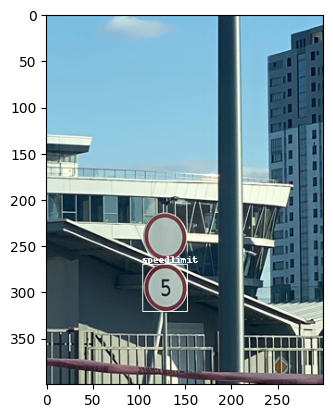

In [18]:
random.seed(55)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("working/annotations", "input/road-sign-detection/images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [19]:
# Read images and annotations
images = [os.path.join('/kaggle/input/road-sign-detection/images', x) for x in os.listdir('/kaggle/input/road-sign-detection/images')]
annotations = [os.path.join('/kaggle/working/annotations', x) for x in os.listdir('/kaggle/working/annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [20]:
!mkdir images/train images/val images/test labels/train labels/val labels/test

In [21]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/kaggle/working/images/train/')
move_files_to_folder(val_images, '/kaggle/working/images/val/')
move_files_to_folder(test_images, '/kaggle/working/images/test/')
move_files_to_folder(train_annotations, '/kaggle/working/labels/train/')
move_files_to_folder(val_annotations, '/kaggle/working/labels/val/')
move_files_to_folder(test_annotations, '/kaggle/working/labels/test/')

In [22]:
yaml_content = """
train: /kaggle/working/images/train/ 
val:  /kaggle/working/images/val/
test: /kaggle/working/images/test/

# number of classes
nc: 4

# class names
names: ["trafficlight","stop", "speedlimit","crosswalk"]
"""

with open("/kaggle/working/road_sign.yaml", "w") as file:
    file.write(yaml_content)

In [23]:
names: ["trafficlight","stop", "speedlimit","crosswalk"]


In [24]:
class config:
    #trainer params
    CHECKPOINT_DIR = '/kaggle/working/checkpoints/'
    EXPERIMENT_NAME = 'road_sign' #specify the experiment name

    #dataset params
    DATA_DIR = '.' #parent directory to where data lives

    TRAIN_IMAGES_DIR = '/kaggle/working/images/train/' #child dir of DATA_DIR where train images are
    TRAIN_LABELS_DIR = '/kaggle/working/labels/train/' #child dir of DATA_DIR where train labels are

    VAL_IMAGES_DIR = '/kaggle/working/images/val/' #child dir of DATA_DIR where validation images are
    VAL_LABELS_DIR = '/kaggle/working/labels/val/' #child dir of DATA_DIR where validation labels are

    # if you have a test set
    TEST_IMAGES_DIR = '/kaggle/working/images/test/' #child dir of DATA_DIR where test images are
    TEST_LABELS_DIR = '/kaggle/working/labels/test/' #child dir of DATA_DIR where test labels are

    CLASSES =["trafficlight","stop", "speedlimit","crosswalk"]

    NUM_CLASSES =4

    #dataloader params - you can add whatever PyTorch dataloader params you have
    #could be different across train, val, and test
    DATALOADER_PARAMS={
    'batch_size':16,
    'num_workers':2
    }

    # model params
    MODEL_NAME = 'yolo_nas_l' # choose from yolo_nas_s, yolo_nas_m, yolo_nas_l
    PRETRAINED_WEIGHTS = 'coco' #only one option here: coco

In [25]:
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, 
                  ckpt_root_dir=config.CHECKPOINT_DIR)

In [26]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.VAL_IMAGES_DIR,
        'labels_dir': config.VAL_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TEST_IMAGES_DIR,
        'labels_dir': config.TEST_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

[2023-11-03 19:49:25] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 701/701 [00:00<00:00, 5048.83it/s]
[2023-11-03 19:49:25] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 88/88 [00:00<00:00, 5604.55it/s]
[2023-11-03 19:49:26] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


Indexing dataset annotations: 100%|██████████| 88/88 [00:00<00:00, 5311.46it/s]


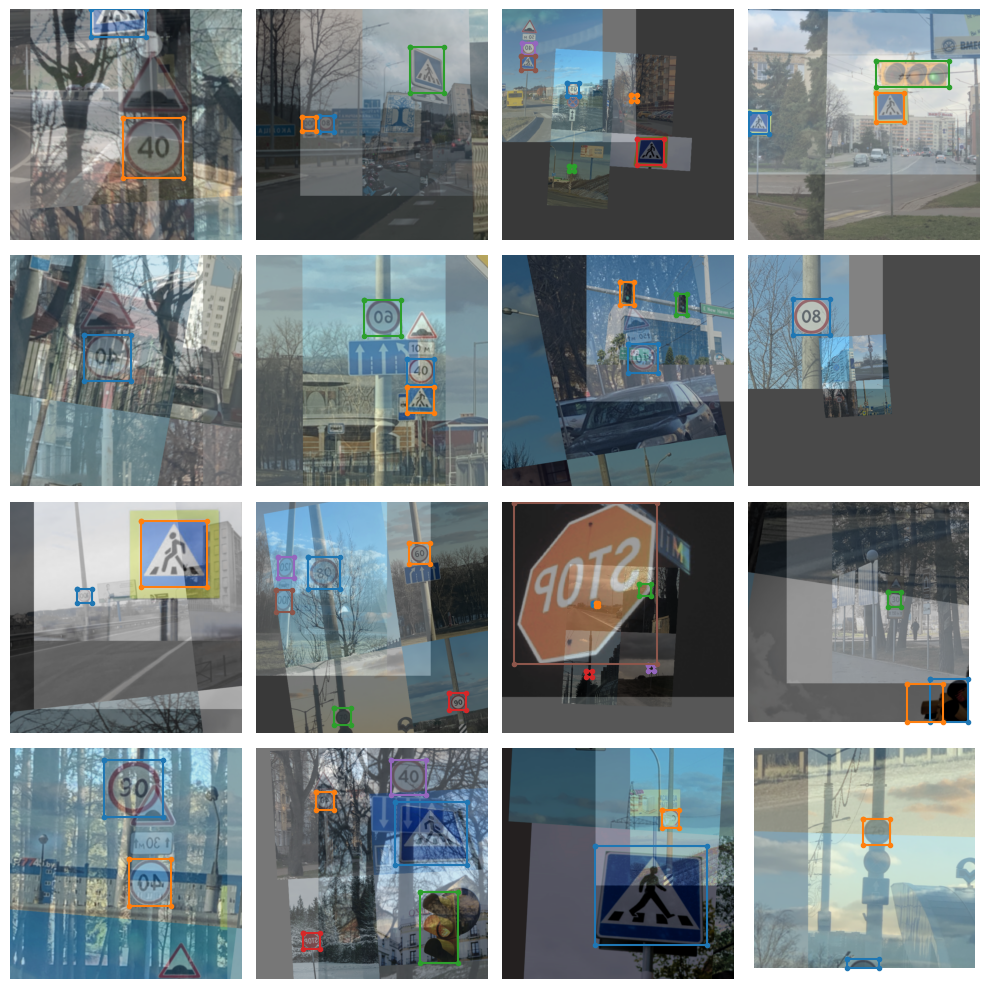

In [27]:
train_data.dataset.plot()

In [28]:
model = models.get(config.MODEL_NAME, 
                   num_classes=config.NUM_CLASSES, 
                   pretrained_weights=config.PRETRAINED_WEIGHTS
                   )

[2023-11-03 19:49:30] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:01<00:00, 236MB/s]  
[2023-11-03 19:49:32] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [29]:
train_params = {
    # ENABLING SILENT MODE
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "AdamW",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 150,
    "mixed_precision": True, #mixed precision is not available for CPU 
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=config.NUM_CLASSES,
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=config.NUM_CLASSES,
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [30]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2023-11-03 19:49:37] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231103_194937_996644`
[2023-11-03 19:49:37] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644
[2023-11-03 19:49:38] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/console_Nov03_19_49_38.txt


/opt/conda/lib/python3.10/site-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
[2023-11-03 19:49:42] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (2 available on the machine)
    - Full dataset size:            701        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         43         (len(train_loader))
    - Gradient updates per epoch:   43         (len

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.9376
│   ├── Ppyoloeloss/loss_iou = 0.1531
│   ├── Ppyoloeloss/loss_dfl = 0.9394
│   └── Ppyoloeloss/loss = 3.7901
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.1725
    ├── Ppyoloeloss/loss_iou = 0.092
    ├── Ppyoloeloss/loss_dfl = 0.6854
    ├── Ppyoloeloss/loss = 3.7453
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0475
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]
[2023-11-03 19:51:41] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 19:51:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8081589341163635


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0871
│   │   ├── Epoch N-1      = 2.9376 (↘ -1.8504)
│   │   └── Best until now = 2.9376 (↘ -1.8504)
│   ├── Ppyoloeloss/loss_iou = 0.1428
│   │   ├── Epoch N-1      = 0.1531 (↘ -0.0103)
│   │   └── Best until now = 0.1531 (↘ -0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.805
│   │   ├── Epoch N-1      = 0.9394 (↘ -0.1345)
│   │   └── Best until now = 0.9394 (↘ -0.1345)
│   └── Ppyoloeloss/loss = 1.8467
│       ├── Epoch N-1      = 3.7901 (↘ -1.9434)
│       └── Best until now = 3.7901 (↘ -1.9434)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2008
    │   ├── Epoch N-1      = 3.1725 (↘ -1.9718)
    │   └── Best until now = 3.1725 (↘ -1.9718)
    ├── Ppyoloeloss/loss_iou = 0.11
    │   ├── Epoch N-1      = 0.092  (↗ 0.018)
    │   └── Best until now = 0.092  (↗ 0.018)
    ├── Ppyoloeloss/loss_dfl = 0.6704
    │   ├── Epoch N-1      = 0.6854 (↘ -0.015)
    │   └── Best until now = 0.6854 (↘ -0.015)
    ├── Ppyoloeloss/loss = 1.81

Validating epoch 2: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]
[2023-11-03 19:52:48] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 19:52:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8490883111953735


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8389
│   │   ├── Epoch N-1      = 1.0871 (↘ -0.2483)
│   │   └── Best until now = 1.0871 (↘ -0.2483)
│   ├── Ppyoloeloss/loss_iou = 0.1435
│   │   ├── Epoch N-1      = 0.1428 (↗ 0.0007)
│   │   └── Best until now = 0.1428 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.8381
│   │   ├── Epoch N-1      = 0.805  (↗ 0.0331)
│   │   └── Best until now = 0.805  (↗ 0.0331)
│   └── Ppyoloeloss/loss = 1.6167
│       ├── Epoch N-1      = 1.8467 (↘ -0.23)
│       └── Best until now = 1.8467 (↘ -0.23)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8149
    │   ├── Epoch N-1      = 1.2008 (↘ -0.3859)
    │   └── Best until now = 1.2008 (↘ -0.3859)
    ├── Ppyoloeloss/loss_iou = 0.1184
    │   ├── Epoch N-1      = 0.11   (↗ 0.0084)
    │   └── Best until now = 0.092  (↗ 0.0264)
    ├── Ppyoloeloss/loss_dfl = 0.7271
    │   ├── Epoch N-1      = 0.6704 (↗ 0.0567)
    │   └── Best until now = 0.6704 (↗ 0.0567)
    ├── Ppyoloeloss/loss = 1.4745


Validating epoch 3: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8096
│   │   ├── Epoch N-1      = 0.8389 (↘ -0.0293)
│   │   └── Best until now = 0.8389 (↘ -0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.1492
│   │   ├── Epoch N-1      = 0.1435 (↗ 0.0057)
│   │   └── Best until now = 0.1428 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.8809
│   │   ├── Epoch N-1      = 0.8381 (↗ 0.0427)
│   │   └── Best until now = 0.805  (↗ 0.0759)
│   └── Ppyoloeloss/loss = 1.6229
│       ├── Epoch N-1      = 1.6167 (↗ 0.0062)
│       └── Best until now = 1.6167 (↗ 0.0062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8254
    │   ├── Epoch N-1      = 0.8149 (↗ 0.0105)
    │   └── Best until now = 0.8149 (↗ 0.0105)
    ├── Ppyoloeloss/loss_iou = 0.12
    │   ├── Epoch N-1      = 0.1184 (↗ 0.0016)
    │   └── Best until now = 0.092  (↗ 0.0279)
    ├── Ppyoloeloss/loss_dfl = 0.757
    │   ├── Epoch N-1      = 0.7271 (↗ 0.0299)
    │   └── Best until now = 0.6704 (↗ 0.0866)
    ├── Ppyoloeloss/loss = 1.5039
   

Validating epoch 4: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]
[2023-11-03 19:54:57] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 19:54:57] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8685116767883301


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7644
│   │   ├── Epoch N-1      = 0.8096 (↘ -0.0452)
│   │   └── Best until now = 0.8096 (↘ -0.0452)
│   ├── Ppyoloeloss/loss_iou = 0.1412
│   │   ├── Epoch N-1      = 0.1492 (↘ -0.008)
│   │   └── Best until now = 0.1428 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.8574
│   │   ├── Epoch N-1      = 0.8809 (↘ -0.0235)
│   │   └── Best until now = 0.805  (↗ 0.0524)
│   └── Ppyoloeloss/loss = 1.546
│       ├── Epoch N-1      = 1.6229 (↘ -0.0769)
│       └── Best until now = 1.6167 (↘ -0.0707)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7025
    │   ├── Epoch N-1      = 0.8254 (↘ -0.1229)
    │   └── Best until now = 0.8149 (↘ -0.1124)
    ├── Ppyoloeloss/loss_iou = 0.1059
    │   ├── Epoch N-1      = 0.12   (↘ -0.0141)
    │   └── Best until now = 0.092  (↗ 0.0139)
    ├── Ppyoloeloss/loss_dfl = 0.7084
    │   ├── Epoch N-1      = 0.757  (↘ -0.0486)
    │   └── Best until now = 0.6704 (↗ 0.038)
    ├── Ppyoloeloss/loss = 1

Validating epoch 5: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7462
│   │   ├── Epoch N-1      = 0.7644 (↘ -0.0182)
│   │   └── Best until now = 0.7644 (↘ -0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.1389
│   │   ├── Epoch N-1      = 0.1412 (↘ -0.0023)
│   │   └── Best until now = 0.1412 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.8464
│   │   ├── Epoch N-1      = 0.8574 (↘ -0.011)
│   │   └── Best until now = 0.805  (↗ 0.0414)
│   └── Ppyoloeloss/loss = 1.5166
│       ├── Epoch N-1      = 1.546  (↘ -0.0294)
│       └── Best until now = 1.546  (↘ -0.0294)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0608
    │   ├── Epoch N-1      = 0.7025 (↗ 0.3583)
    │   └── Best until now = 0.7025 (↗ 0.3583)
    ├── Ppyoloeloss/loss_iou = 0.1094
    │   ├── Epoch N-1      = 0.1059 (↗ 0.0035)
    │   └── Best until now = 0.092  (↗ 0.0174)
    ├── Ppyoloeloss/loss_dfl = 0.7225
    │   ├── Epoch N-1      = 0.7084 (↗ 0.014)
    │   └── Best until now = 0.6704 (↗ 0.0521)
    ├── Ppyoloeloss/loss = 1.69

Validating epoch 6: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7339
│   │   ├── Epoch N-1      = 0.7462 (↘ -0.0123)
│   │   └── Best until now = 0.7462 (↘ -0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.1406
│   │   ├── Epoch N-1      = 0.1389 (↗ 0.0017)
│   │   └── Best until now = 0.1389 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.8507
│   │   ├── Epoch N-1      = 0.8464 (↗ 0.0043)
│   │   └── Best until now = 0.805  (↗ 0.0457)
│   └── Ppyoloeloss/loss = 1.5107
│       ├── Epoch N-1      = 1.5166 (↘ -0.0059)
│       └── Best until now = 1.5166 (↘ -0.0059)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7246
    │   ├── Epoch N-1      = 1.0608 (↘ -0.3362)
    │   └── Best until now = 0.7025 (↗ 0.0221)
    ├── Ppyoloeloss/loss_iou = 0.1184
    │   ├── Epoch N-1      = 0.1094 (↗ 0.009)
    │   └── Best until now = 0.092  (↗ 0.0264)
    ├── Ppyoloeloss/loss_dfl = 0.7391
    │   ├── Epoch N-1      = 0.7225 (↗ 0.0166)
    │   └── Best until now = 0.6704 (↗ 0.0687)
    ├── Ppyoloeloss/loss = 1.390

Validating epoch 7: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]
[2023-11-03 19:58:18] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 19:58:18] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8932718634605408


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7219
│   │   ├── Epoch N-1      = 0.7339 (↘ -0.0119)
│   │   └── Best until now = 0.7339 (↘ -0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.1387
│   │   ├── Epoch N-1      = 0.1406 (↘ -0.0019)
│   │   └── Best until now = 0.1389 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.85
│   │   ├── Epoch N-1      = 0.8507 (↘ -0.0007)
│   │   └── Best until now = 0.805  (↗ 0.045)
│   └── Ppyoloeloss/loss = 1.4937
│       ├── Epoch N-1      = 1.5107 (↘ -0.0171)
│       └── Best until now = 1.5107 (↘ -0.0171)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6273
    │   ├── Epoch N-1      = 0.7246 (↘ -0.0974)
    │   └── Best until now = 0.7025 (↘ -0.0752)
    ├── Ppyoloeloss/loss_iou = 0.1118
    │   ├── Epoch N-1      = 0.1184 (↘ -0.0066)
    │   └── Best until now = 0.092  (↗ 0.0198)
    ├── Ppyoloeloss/loss_dfl = 0.7244
    │   ├── Epoch N-1      = 0.7391 (↘ -0.0147)
    │   └── Best until now = 0.6704 (↗ 0.054)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 8: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]
[2023-11-03 19:59:33] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 19:59:33] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9238019585609436


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6956
│   │   ├── Epoch N-1      = 0.7219 (↘ -0.0264)
│   │   └── Best until now = 0.7219 (↘ -0.0264)
│   ├── Ppyoloeloss/loss_iou = 0.1331
│   │   ├── Epoch N-1      = 0.1387 (↘ -0.0056)
│   │   └── Best until now = 0.1387 (↘ -0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.8293
│   │   ├── Epoch N-1      = 0.85   (↘ -0.0207)
│   │   └── Best until now = 0.805  (↗ 0.0244)
│   └── Ppyoloeloss/loss = 1.443
│       ├── Epoch N-1      = 1.4937 (↘ -0.0506)
│       └── Best until now = 1.4937 (↘ -0.0506)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5971
    │   ├── Epoch N-1      = 0.6273 (↘ -0.0302)
    │   └── Best until now = 0.6273 (↘ -0.0302)
    ├── Ppyoloeloss/loss_iou = 0.1163
    │   ├── Epoch N-1      = 0.1118 (↗ 0.0045)
    │   └── Best until now = 0.092  (↗ 0.0243)
    ├── Ppyoloeloss/loss_dfl = 0.7367
    │   ├── Epoch N-1      = 0.7244 (↗ 0.0123)
    │   └── Best until now = 0.6704 (↗ 0.0663)
    ├── Ppyoloeloss/loss = 1

Validating epoch 9: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6905
│   │   ├── Epoch N-1      = 0.6956 (↘ -0.005)
│   │   └── Best until now = 0.6956 (↘ -0.005)
│   ├── Ppyoloeloss/loss_iou = 0.1302
│   │   ├── Epoch N-1      = 0.1331 (↘ -0.0029)
│   │   └── Best until now = 0.1331 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.812
│   │   ├── Epoch N-1      = 0.8293 (↘ -0.0174)
│   │   └── Best until now = 0.805  (↗ 0.007)
│   └── Ppyoloeloss/loss = 1.422
│       ├── Epoch N-1      = 1.443  (↘ -0.021)
│       └── Best until now = 1.443  (↘ -0.021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6776
    │   ├── Epoch N-1      = 0.5971 (↗ 0.0805)
    │   └── Best until now = 0.5971 (↗ 0.0805)
    ├── Ppyoloeloss/loss_iou = 0.1159
    │   ├── Epoch N-1      = 0.1163 (↘ -0.0005)
    │   └── Best until now = 0.092  (↗ 0.0238)
    ├── Ppyoloeloss/loss_dfl = 0.7341
    │   ├── Epoch N-1      = 0.7367 (↘ -0.0026)
    │   └── Best until now = 0.6704 (↗ 0.0637)
    ├── Ppyoloeloss/loss = 1.3342


Validating epoch 10: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6991
│   │   ├── Epoch N-1      = 0.6905 (↗ 0.0086)
│   │   └── Best until now = 0.6905 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_iou = 0.1331
│   │   ├── Epoch N-1      = 0.1302 (↗ 0.0029)
│   │   └── Best until now = 0.1302 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.8262
│   │   ├── Epoch N-1      = 0.812  (↗ 0.0143)
│   │   └── Best until now = 0.805  (↗ 0.0213)
│   └── Ppyoloeloss/loss = 1.4451
│       ├── Epoch N-1      = 1.422  (↗ 0.0231)
│       └── Best until now = 1.422  (↗ 0.0231)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6237
    │   ├── Epoch N-1      = 0.6776 (↘ -0.0539)
    │   └── Best until now = 0.5971 (↗ 0.0266)
    ├── Ppyoloeloss/loss_iou = 0.107
    │   ├── Epoch N-1      = 0.1159 (↘ -0.0089)
    │   └── Best until now = 0.092  (↗ 0.0149)
    ├── Ppyoloeloss/loss_dfl = 0.7078
    │   ├── Epoch N-1      = 0.7341 (↘ -0.0262)
    │   └── Best until now = 0.6704 (↗ 0.0374)
    ├── Ppyoloeloss/loss = 1.245


Validating epoch 11: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6843
│   │   ├── Epoch N-1      = 0.6991 (↘ -0.0148)
│   │   └── Best until now = 0.6905 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.1285
│   │   ├── Epoch N-1      = 0.1331 (↘ -0.0047)
│   │   └── Best until now = 0.1302 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.8099
│   │   ├── Epoch N-1      = 0.8262 (↘ -0.0163)
│   │   └── Best until now = 0.805  (↗ 0.0049)
│   └── Ppyoloeloss/loss = 1.4104
│       ├── Epoch N-1      = 1.4451 (↘ -0.0347)
│       └── Best until now = 1.422  (↘ -0.0117)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6224
    │   ├── Epoch N-1      = 0.6237 (↘ -0.0013)
    │   └── Best until now = 0.5971 (↗ 0.0253)
    ├── Ppyoloeloss/loss_iou = 0.1128
    │   ├── Epoch N-1      = 0.107  (↗ 0.0058)
    │   └── Best until now = 0.092  (↗ 0.0208)
    ├── Ppyoloeloss/loss_dfl = 0.7215
    │   ├── Epoch N-1      = 0.7078 (↗ 0.0137)
    │   └── Best until now = 0.6704 (↗ 0.0511)
    ├── Ppyoloeloss/loss = 

Validating epoch 12: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6654
│   │   ├── Epoch N-1      = 0.6843 (↘ -0.0189)
│   │   └── Best until now = 0.6843 (↘ -0.0189)
│   ├── Ppyoloeloss/loss_iou = 0.1289
│   │   ├── Epoch N-1      = 0.1285 (↗ 0.0004)
│   │   └── Best until now = 0.1285 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.8159
│   │   ├── Epoch N-1      = 0.8099 (↗ 0.006)
│   │   └── Best until now = 0.805  (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.3956
│       ├── Epoch N-1      = 1.4104 (↘ -0.0148)
│       └── Best until now = 1.4104 (↘ -0.0148)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7685
    │   ├── Epoch N-1      = 0.6224 (↗ 0.1461)
    │   └── Best until now = 0.5971 (↗ 0.1714)
    ├── Ppyoloeloss/loss_iou = 0.1221
    │   ├── Epoch N-1      = 0.1128 (↗ 0.0093)
    │   └── Best until now = 0.092  (↗ 0.03)
    ├── Ppyoloeloss/loss_dfl = 0.7438
    │   ├── Epoch N-1      = 0.7215 (↗ 0.0223)
    │   └── Best until now = 0.6704 (↗ 0.0734)
    ├── Ppyoloeloss/loss = 1.4455


Validating epoch 13: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]
[2023-11-03 20:05:44] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 20:05:44] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9410963654518127


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6758
│   │   ├── Epoch N-1      = 0.6654 (↗ 0.0104)
│   │   └── Best until now = 0.6654 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.1301
│   │   ├── Epoch N-1      = 0.1289 (↗ 0.0012)
│   │   └── Best until now = 0.1285 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.7978
│   │   ├── Epoch N-1      = 0.8159 (↘ -0.0181)
│   │   └── Best until now = 0.805  (↘ -0.0072)
│   └── Ppyoloeloss/loss = 1.3998
│       ├── Epoch N-1      = 1.3956 (↗ 0.0042)
│       └── Best until now = 1.3956 (↗ 0.0042)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6147
    │   ├── Epoch N-1      = 0.7685 (↘ -0.1537)
    │   └── Best until now = 0.5971 (↗ 0.0177)
    ├── Ppyoloeloss/loss_iou = 0.1057
    │   ├── Epoch N-1      = 0.1221 (↘ -0.0163)
    │   └── Best until now = 0.092  (↗ 0.0137)
    ├── Ppyoloeloss/loss_dfl = 0.7004
    │   ├── Epoch N-1      = 0.7438 (↘ -0.0434)
    │   └── Best until now = 0.6704 (↗ 0.03)
    ├── Ppyoloeloss/loss = 1.229

Validating epoch 14: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6678
│   │   ├── Epoch N-1      = 0.6758 (↘ -0.008)
│   │   └── Best until now = 0.6654 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.1272
│   │   ├── Epoch N-1      = 0.1301 (↘ -0.0028)
│   │   └── Best until now = 0.1285 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.794
│   │   ├── Epoch N-1      = 0.7978 (↘ -0.0038)
│   │   └── Best until now = 0.7978 (↘ -0.0038)
│   └── Ppyoloeloss/loss = 1.3829
│       ├── Epoch N-1      = 1.3998 (↘ -0.0169)
│       └── Best until now = 1.3956 (↘ -0.0127)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.648
    │   ├── Epoch N-1      = 0.6147 (↗ 0.0333)
    │   └── Best until now = 0.5971 (↗ 0.0509)
    ├── Ppyoloeloss/loss_iou = 0.1164
    │   ├── Epoch N-1      = 0.1057 (↗ 0.0107)
    │   └── Best until now = 0.092  (↗ 0.0244)
    ├── Ppyoloeloss/loss_dfl = 0.7199
    │   ├── Epoch N-1      = 0.7004 (↗ 0.0195)
    │   └── Best until now = 0.6704 (↗ 0.0495)
    ├── Ppyoloeloss/loss = 1.29

Validating epoch 15: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6586
│   │   ├── Epoch N-1      = 0.6678 (↘ -0.0092)
│   │   └── Best until now = 0.6654 (↘ -0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.1278
│   │   ├── Epoch N-1      = 0.1272 (↗ 0.0006)
│   │   └── Best until now = 0.1272 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.8007
│   │   ├── Epoch N-1      = 0.794  (↗ 0.0067)
│   │   └── Best until now = 0.794  (↗ 0.0067)
│   └── Ppyoloeloss/loss = 1.3785
│       ├── Epoch N-1      = 1.3829 (↘ -0.0043)
│       └── Best until now = 1.3829 (↘ -0.0043)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6083
    │   ├── Epoch N-1      = 0.648  (↘ -0.0397)
    │   └── Best until now = 0.5971 (↗ 0.0113)
    ├── Ppyoloeloss/loss_iou = 0.1171
    │   ├── Epoch N-1      = 0.1164 (↗ 0.0007)
    │   └── Best until now = 0.092  (↗ 0.0251)
    ├── Ppyoloeloss/loss_dfl = 0.73
    │   ├── Epoch N-1      = 0.7199 (↗ 0.0101)
    │   └── Best until now = 0.6704 (↗ 0.0596)
    ├── Ppyoloeloss/loss = 1.266

Validating epoch 16: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6599
│   │   ├── Epoch N-1      = 0.6586 (↗ 0.0013)
│   │   └── Best until now = 0.6586 (↗ 0.0013)
│   ├── Ppyoloeloss/loss_iou = 0.1248
│   │   ├── Epoch N-1      = 0.1278 (↘ -0.003)
│   │   └── Best until now = 0.1272 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.7921
│   │   ├── Epoch N-1      = 0.8007 (↘ -0.0086)
│   │   └── Best until now = 0.794  (↘ -0.0019)
│   └── Ppyoloeloss/loss = 1.368
│       ├── Epoch N-1      = 1.3785 (↘ -0.0105)
│       └── Best until now = 1.3785 (↘ -0.0105)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.643
    │   ├── Epoch N-1      = 0.6083 (↗ 0.0346)
    │   └── Best until now = 0.5971 (↗ 0.0459)
    ├── Ppyoloeloss/loss_iou = 0.1008
    │   ├── Epoch N-1      = 0.1171 (↘ -0.0164)
    │   └── Best until now = 0.092  (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.6906
    │   ├── Epoch N-1      = 0.73   (↘ -0.0394)
    │   └── Best until now = 0.6704 (↗ 0.0202)
    ├── Ppyoloeloss/loss = 1.2

Validating epoch 17: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6515
│   │   ├── Epoch N-1      = 0.6599 (↘ -0.0084)
│   │   └── Best until now = 0.6586 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.1225
│   │   ├── Epoch N-1      = 0.1248 (↘ -0.0023)
│   │   └── Best until now = 0.1248 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.7766
│   │   ├── Epoch N-1      = 0.7921 (↘ -0.0155)
│   │   └── Best until now = 0.7921 (↘ -0.0155)
│   └── Ppyoloeloss/loss = 1.3461
│       ├── Epoch N-1      = 1.368  (↘ -0.0219)
│       └── Best until now = 1.368  (↘ -0.0219)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6076
    │   ├── Epoch N-1      = 0.643  (↘ -0.0354)
    │   └── Best until now = 0.5971 (↗ 0.0105)
    ├── Ppyoloeloss/loss_iou = 0.1091
    │   ├── Epoch N-1      = 0.1008 (↗ 0.0084)
    │   └── Best until now = 0.092  (↗ 0.0171)
    ├── Ppyoloeloss/loss_dfl = 0.706
    │   ├── Epoch N-1      = 0.6906 (↗ 0.0154)
    │   └── Best until now = 0.6704 (↗ 0.0356)
    ├── Ppyoloeloss/loss = 

Validating epoch 18: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6395
│   │   ├── Epoch N-1      = 0.6515 (↘ -0.0121)
│   │   └── Best until now = 0.6515 (↘ -0.0121)
│   ├── Ppyoloeloss/loss_iou = 0.1231
│   │   ├── Epoch N-1      = 0.1225 (↗ 0.0006)
│   │   └── Best until now = 0.1225 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.7876
│   │   ├── Epoch N-1      = 0.7766 (↗ 0.011)
│   │   └── Best until now = 0.7766 (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.341
│       ├── Epoch N-1      = 1.3461 (↘ -0.0052)
│       └── Best until now = 1.3461 (↘ -0.0052)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6095
    │   ├── Epoch N-1      = 0.6076 (↗ 0.002)
    │   └── Best until now = 0.5971 (↗ 0.0124)
    ├── Ppyoloeloss/loss_iou = 0.109
    │   ├── Epoch N-1      = 0.1091 (↘ -1e-04)
    │   └── Best until now = 0.092  (↗ 0.017)
    ├── Ppyoloeloss/loss_dfl = 0.7125
    │   ├── Epoch N-1      = 0.706  (↗ 0.0064)
    │   └── Best until now = 0.6704 (↗ 0.0421)
    ├── Ppyoloeloss/loss = 1.2383
   

Validating epoch 19: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6642
│   │   ├── Epoch N-1      = 0.6395 (↗ 0.0247)
│   │   └── Best until now = 0.6395 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_iou = 0.1289
│   │   ├── Epoch N-1      = 0.1231 (↗ 0.0058)
│   │   └── Best until now = 0.1225 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.7992
│   │   ├── Epoch N-1      = 0.7876 (↗ 0.0116)
│   │   └── Best until now = 0.7766 (↗ 0.0226)
│   └── Ppyoloeloss/loss = 1.3859
│       ├── Epoch N-1      = 1.341  (↗ 0.0449)
│       └── Best until now = 1.341  (↗ 0.0449)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.671
    │   ├── Epoch N-1      = 0.6095 (↗ 0.0615)
    │   └── Best until now = 0.5971 (↗ 0.074)
    ├── Ppyoloeloss/loss_iou = 0.1166
    │   ├── Epoch N-1      = 0.109  (↗ 0.0076)
    │   └── Best until now = 0.092  (↗ 0.0246)
    ├── Ppyoloeloss/loss_dfl = 0.7146
    │   ├── Epoch N-1      = 0.7125 (↗ 0.0022)
    │   └── Best until now = 0.6704 (↗ 0.0442)
    ├── Ppyoloeloss/loss = 1.3199
   

Validating epoch 20: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6659
│   │   ├── Epoch N-1      = 0.6642 (↗ 0.0018)
│   │   └── Best until now = 0.6395 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.1242
│   │   ├── Epoch N-1      = 0.1289 (↘ -0.0047)
│   │   └── Best until now = 0.1225 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.7866
│   │   ├── Epoch N-1      = 0.7992 (↘ -0.0126)
│   │   └── Best until now = 0.7766 (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.3696
│       ├── Epoch N-1      = 1.3859 (↘ -0.0163)
│       └── Best until now = 1.341  (↗ 0.0286)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6046
    │   ├── Epoch N-1      = 0.671  (↘ -0.0664)
    │   └── Best until now = 0.5971 (↗ 0.0075)
    ├── Ppyoloeloss/loss_iou = 0.1045
    │   ├── Epoch N-1      = 0.1166 (↘ -0.0121)
    │   └── Best until now = 0.092  (↗ 0.0125)
    ├── Ppyoloeloss/loss_dfl = 0.6832
    │   ├── Epoch N-1      = 0.7146 (↘ -0.0314)
    │   └── Best until now = 0.6704 (↗ 0.0128)
    ├── Ppyoloeloss/loss = 1.20

Validating epoch 21: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.646
│   │   ├── Epoch N-1      = 0.6659 (↘ -0.02)
│   │   └── Best until now = 0.6395 (↗ 0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.1216
│   │   ├── Epoch N-1      = 0.1242 (↘ -0.0025)
│   │   └── Best until now = 0.1225 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.7761
│   │   ├── Epoch N-1      = 0.7866 (↘ -0.0104)
│   │   └── Best until now = 0.7766 (↘ -0.0004)
│   └── Ppyoloeloss/loss = 1.3381
│       ├── Epoch N-1      = 1.3696 (↘ -0.0315)
│       └── Best until now = 1.341  (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6063
    │   ├── Epoch N-1      = 0.6046 (↗ 0.0017)
    │   └── Best until now = 0.5971 (↗ 0.0092)
    ├── Ppyoloeloss/loss_iou = 0.1086
    │   ├── Epoch N-1      = 0.1045 (↗ 0.0041)
    │   └── Best until now = 0.092  (↗ 0.0165)
    ├── Ppyoloeloss/loss_dfl = 0.7021
    │   ├── Epoch N-1      = 0.6832 (↗ 0.0188)
    │   └── Best until now = 0.6704 (↗ 0.0317)
    ├── Ppyoloeloss/loss = 1.22

Validating epoch 22: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6403
│   │   ├── Epoch N-1      = 0.646  (↘ -0.0056)
│   │   └── Best until now = 0.6395 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.1199
│   │   ├── Epoch N-1      = 0.1216 (↘ -0.0017)
│   │   └── Best until now = 0.1216 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.7727
│   │   ├── Epoch N-1      = 0.7761 (↘ -0.0035)
│   │   └── Best until now = 0.7761 (↘ -0.0035)
│   └── Ppyoloeloss/loss = 1.3264
│       ├── Epoch N-1      = 1.3381 (↘ -0.0117)
│       └── Best until now = 1.3381 (↘ -0.0117)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.564
    │   ├── Epoch N-1      = 0.6063 (↘ -0.0423)
    │   └── Best until now = 0.5971 (↘ -0.0331)
    ├── Ppyoloeloss/loss_iou = 0.0974
    │   ├── Epoch N-1      = 0.1086 (↘ -0.0112)
    │   └── Best until now = 0.092  (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 0.6837
    │   ├── Epoch N-1      = 0.7021 (↘ -0.0184)
    │   └── Best until now = 0.6704 (↗ 0.0133)
    ├── Ppyoloeloss/loss 

Validating epoch 23: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]
[2023-11-03 20:18:10] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 20:18:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9456176161766052


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6323
│   │   ├── Epoch N-1      = 0.6403 (↘ -0.0081)
│   │   └── Best until now = 0.6395 (↘ -0.0072)
│   ├── Ppyoloeloss/loss_iou = 0.1176
│   │   ├── Epoch N-1      = 0.1199 (↘ -0.0023)
│   │   └── Best until now = 0.1199 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.7613
│   │   ├── Epoch N-1      = 0.7727 (↘ -0.0114)
│   │   └── Best until now = 0.7727 (↘ -0.0114)
│   └── Ppyoloeloss/loss = 1.3069
│       ├── Epoch N-1      = 1.3264 (↘ -0.0195)
│       └── Best until now = 1.3264 (↘ -0.0195)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6068
    │   ├── Epoch N-1      = 0.564  (↗ 0.0429)
    │   └── Best until now = 0.564  (↗ 0.0429)
    ├── Ppyoloeloss/loss_iou = 0.1012
    │   ├── Epoch N-1      = 0.0974 (↗ 0.0038)
    │   └── Best until now = 0.092  (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.6817
    │   ├── Epoch N-1      = 0.6837 (↘ -0.002)
    │   └── Best until now = 0.6704 (↗ 0.0113)
    ├── Ppyoloeloss/loss = 

Validating epoch 24: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6479
│   │   ├── Epoch N-1      = 0.6323 (↗ 0.0156)
│   │   └── Best until now = 0.6323 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_iou = 0.1215
│   │   ├── Epoch N-1      = 0.1176 (↗ 0.0039)
│   │   └── Best until now = 0.1176 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.776
│   │   ├── Epoch N-1      = 0.7613 (↗ 0.0147)
│   │   └── Best until now = 0.7613 (↗ 0.0147)
│   └── Ppyoloeloss/loss = 1.3396
│       ├── Epoch N-1      = 1.3069 (↗ 0.0326)
│       └── Best until now = 1.3069 (↗ 0.0326)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.571
    │   ├── Epoch N-1      = 0.6068 (↘ -0.0358)
    │   └── Best until now = 0.564  (↗ 0.007)
    ├── Ppyoloeloss/loss_iou = 0.0938
    │   ├── Epoch N-1      = 0.1012 (↘ -0.0074)
    │   └── Best until now = 0.092  (↗ 0.0018)
    ├── Ppyoloeloss/loss_dfl = 0.6867
    │   ├── Epoch N-1      = 0.6817 (↗ 0.005)
    │   └── Best until now = 0.6704 (↗ 0.0163)
    ├── Ppyoloeloss/loss = 1.149
    

Validating epoch 25: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6341
│   │   ├── Epoch N-1      = 0.6479 (↘ -0.0137)
│   │   └── Best until now = 0.6323 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_iou = 0.1191
│   │   ├── Epoch N-1      = 0.1215 (↘ -0.0024)
│   │   └── Best until now = 0.1176 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_dfl = 0.7735
│   │   ├── Epoch N-1      = 0.776  (↘ -0.0025)
│   │   └── Best until now = 0.7613 (↗ 0.0122)
│   └── Ppyoloeloss/loss = 1.3185
│       ├── Epoch N-1      = 1.3396 (↘ -0.021)
│       └── Best until now = 1.3069 (↗ 0.0116)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.571  (↗ 0.08)
    │   └── Best until now = 0.564  (↗ 0.0871)
    ├── Ppyoloeloss/loss_iou = 0.1015
    │   ├── Epoch N-1      = 0.0938 (↗ 0.0077)
    │   └── Best until now = 0.092  (↗ 0.0095)
    ├── Ppyoloeloss/loss_dfl = 0.6793
    │   ├── Epoch N-1      = 0.6867 (↘ -0.0074)
    │   └── Best until now = 0.6704 (↗ 0.0089)
    ├── Ppyoloeloss/loss = 1.2445


Validating epoch 26: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6252
│   │   ├── Epoch N-1      = 0.6341 (↘ -0.0089)
│   │   └── Best until now = 0.6323 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.1187
│   │   ├── Epoch N-1      = 0.1191 (↘ -0.0004)
│   │   └── Best until now = 0.1176 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_dfl = 0.7607
│   │   ├── Epoch N-1      = 0.7735 (↘ -0.0128)
│   │   └── Best until now = 0.7613 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 1.3022
│       ├── Epoch N-1      = 1.3185 (↘ -0.0163)
│       └── Best until now = 1.3069 (↘ -0.0047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6447
    │   ├── Epoch N-1      = 0.651  (↘ -0.0064)
    │   └── Best until now = 0.564  (↗ 0.0807)
    ├── Ppyoloeloss/loss_iou = 0.0985
    │   ├── Epoch N-1      = 0.1015 (↘ -0.003)
    │   └── Best until now = 0.092  (↗ 0.0065)
    ├── Ppyoloeloss/loss_dfl = 0.6757
    │   ├── Epoch N-1      = 0.6793 (↘ -0.0036)
    │   └── Best until now = 0.6704 (↗ 0.0053)
    ├── Ppyoloeloss/loss =

Validating epoch 27: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6193
│   │   ├── Epoch N-1      = 0.6252 (↘ -0.0059)
│   │   └── Best until now = 0.6252 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.1137
│   │   ├── Epoch N-1      = 0.1187 (↘ -0.005)
│   │   └── Best until now = 0.1176 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.7611
│   │   ├── Epoch N-1      = 0.7607 (↗ 0.0005)
│   │   └── Best until now = 0.7607 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 1.2841
│       ├── Epoch N-1      = 1.3022 (↘ -0.0181)
│       └── Best until now = 1.3022 (↘ -0.0181)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5576
    │   ├── Epoch N-1      = 0.6447 (↘ -0.0871)
    │   └── Best until now = 0.564  (↘ -0.0064)
    ├── Ppyoloeloss/loss_iou = 0.0959
    │   ├── Epoch N-1      = 0.0985 (↘ -0.0026)
    │   └── Best until now = 0.092  (↗ 0.0039)
    ├── Ppyoloeloss/loss_dfl = 0.6905
    │   ├── Epoch N-1      = 0.6757 (↗ 0.0148)
    │   └── Best until now = 0.6704 (↗ 0.0201)
    ├── Ppyoloeloss/loss = 

Validating epoch 28: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6233
│   │   ├── Epoch N-1      = 0.6193 (↗ 0.004)
│   │   └── Best until now = 0.6193 (↗ 0.004)
│   ├── Ppyoloeloss/loss_iou = 0.1148
│   │   ├── Epoch N-1      = 0.1137 (↗ 0.0011)
│   │   └── Best until now = 0.1137 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_dfl = 0.763
│   │   ├── Epoch N-1      = 0.7611 (↗ 0.0019)
│   │   └── Best until now = 0.7607 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.2918
│       ├── Epoch N-1      = 1.2841 (↗ 0.0078)
│       └── Best until now = 1.2841 (↗ 0.0078)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5875
    │   ├── Epoch N-1      = 0.5576 (↗ 0.0299)
    │   └── Best until now = 0.5576 (↗ 0.0299)
    ├── Ppyoloeloss/loss_iou = 0.1007
    │   ├── Epoch N-1      = 0.0959 (↗ 0.0048)
    │   └── Best until now = 0.092  (↗ 0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.6892
    │   ├── Epoch N-1      = 0.6905 (↘ -0.0013)
    │   └── Best until now = 0.6704 (↗ 0.0188)
    ├── Ppyoloeloss/loss = 1.1838
   

Validating epoch 29: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6487
│   │   ├── Epoch N-1      = 0.6233 (↗ 0.0254)
│   │   └── Best until now = 0.6193 (↗ 0.0294)
│   ├── Ppyoloeloss/loss_iou = 0.1177
│   │   ├── Epoch N-1      = 0.1148 (↗ 0.0029)
│   │   └── Best until now = 0.1137 (↗ 0.004)
│   ├── Ppyoloeloss/loss_dfl = 0.777
│   │   ├── Epoch N-1      = 0.763  (↗ 0.014)
│   │   └── Best until now = 0.7607 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.3315
│       ├── Epoch N-1      = 1.2918 (↗ 0.0396)
│       └── Best until now = 1.2841 (↗ 0.0474)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6751
    │   ├── Epoch N-1      = 0.5875 (↗ 0.0876)
    │   └── Best until now = 0.5576 (↗ 0.1175)
    ├── Ppyoloeloss/loss_iou = 0.1095
    │   ├── Epoch N-1      = 0.1007 (↗ 0.0088)
    │   └── Best until now = 0.092  (↗ 0.0175)
    ├── Ppyoloeloss/loss_dfl = 0.7176
    │   ├── Epoch N-1      = 0.6892 (↗ 0.0285)
    │   └── Best until now = 0.6704 (↗ 0.0472)
    ├── Ppyoloeloss/loss = 1.3077
    

Validating epoch 30: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.63
│   │   ├── Epoch N-1      = 0.6487 (↘ -0.0187)
│   │   └── Best until now = 0.6193 (↗ 0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.1176
│   │   ├── Epoch N-1      = 0.1177 (↘ -1e-04)
│   │   └── Best until now = 0.1137 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.7649
│   │   ├── Epoch N-1      = 0.777  (↘ -0.0121)
│   │   └── Best until now = 0.7607 (↗ 0.0042)
│   └── Ppyoloeloss/loss = 1.3063
│       ├── Epoch N-1      = 1.3315 (↘ -0.0252)
│       └── Best until now = 1.2841 (↗ 0.0222)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5892
    │   ├── Epoch N-1      = 0.6751 (↘ -0.0859)
    │   └── Best until now = 0.5576 (↗ 0.0317)
    ├── Ppyoloeloss/loss_iou = 0.0977
    │   ├── Epoch N-1      = 0.1095 (↘ -0.0118)
    │   └── Best until now = 0.092  (↗ 0.0056)
    ├── Ppyoloeloss/loss_dfl = 0.692
    │   ├── Epoch N-1      = 0.7176 (↘ -0.0257)
    │   └── Best until now = 0.6704 (↗ 0.0216)
    ├── Ppyoloeloss/loss = 1.179

Validating epoch 31: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]
[2023-11-03 20:27:55] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 20:27:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9471684694290161


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6332
│   │   ├── Epoch N-1      = 0.63   (↗ 0.0032)
│   │   └── Best until now = 0.6193 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_iou = 0.1169
│   │   ├── Epoch N-1      = 0.1176 (↘ -0.0007)
│   │   └── Best until now = 0.1137 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.7714
│   │   ├── Epoch N-1      = 0.7649 (↗ 0.0066)
│   │   └── Best until now = 0.7607 (↗ 0.0108)
│   └── Ppyoloeloss/loss = 1.3111
│       ├── Epoch N-1      = 1.3063 (↗ 0.0048)
│       └── Best until now = 1.2841 (↗ 0.027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6006
    │   ├── Epoch N-1      = 0.5892 (↗ 0.0114)
    │   └── Best until now = 0.5576 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.0923
    │   ├── Epoch N-1      = 0.0977 (↘ -0.0054)
    │   └── Best until now = 0.092  (↗ 0.0002)
    ├── Ppyoloeloss/loss_dfl = 0.6641
    │   ├── Epoch N-1      = 0.692  (↘ -0.0278)
    │   └── Best until now = 0.6704 (↘ -0.0063)
    ├── Ppyoloeloss/loss = 1.1633

Validating epoch 32: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6086
│   │   ├── Epoch N-1      = 0.6332 (↘ -0.0246)
│   │   └── Best until now = 0.6193 (↘ -0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.1127
│   │   ├── Epoch N-1      = 0.1169 (↘ -0.0042)
│   │   └── Best until now = 0.1137 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.7462
│   │   ├── Epoch N-1      = 0.7714 (↘ -0.0252)
│   │   └── Best until now = 0.7607 (↘ -0.0144)
│   └── Ppyoloeloss/loss = 1.2635
│       ├── Epoch N-1      = 1.3111 (↘ -0.0476)
│       └── Best until now = 1.2841 (↘ -0.0206)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5853
    │   ├── Epoch N-1      = 0.6006 (↘ -0.0153)
    │   └── Best until now = 0.5576 (↗ 0.0277)
    ├── Ppyoloeloss/loss_iou = 0.1028
    │   ├── Epoch N-1      = 0.0923 (↗ 0.0106)
    │   └── Best until now = 0.092  (↗ 0.0108)
    ├── Ppyoloeloss/loss_dfl = 0.6939
    │   ├── Epoch N-1      = 0.6641 (↗ 0.0298)
    │   └── Best until now = 0.6641 (↗ 0.0298)
    ├── Ppyoloeloss/loss = 

Validating epoch 33: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6048
│   │   ├── Epoch N-1      = 0.6086 (↘ -0.0038)
│   │   └── Best until now = 0.6086 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.1121
│   │   ├── Epoch N-1      = 0.1127 (↘ -0.0006)
│   │   └── Best until now = 0.1127 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.7585
│   │   ├── Epoch N-1      = 0.7462 (↗ 0.0122)
│   │   └── Best until now = 0.7462 (↗ 0.0122)
│   └── Ppyoloeloss/loss = 1.2643
│       ├── Epoch N-1      = 1.2635 (↗ 0.0009)
│       └── Best until now = 1.2635 (↗ 0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6257
    │   ├── Epoch N-1      = 0.5853 (↗ 0.0404)
    │   └── Best until now = 0.5576 (↗ 0.0681)
    ├── Ppyoloeloss/loss_iou = 0.1009
    │   ├── Epoch N-1      = 0.1028 (↘ -0.002)
    │   └── Best until now = 0.092  (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 0.6806
    │   ├── Epoch N-1      = 0.6939 (↘ -0.0133)
    │   └── Best until now = 0.6641 (↗ 0.0165)
    ├── Ppyoloeloss/loss = 1.2

Validating epoch 34: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6072
│   │   ├── Epoch N-1      = 0.6048 (↗ 0.0024)
│   │   └── Best until now = 0.6048 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.1113
│   │   ├── Epoch N-1      = 0.1121 (↘ -0.0008)
│   │   └── Best until now = 0.1121 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.7472
│   │   ├── Epoch N-1      = 0.7585 (↘ -0.0113)
│   │   └── Best until now = 0.7462 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.2589
│       ├── Epoch N-1      = 1.2643 (↘ -0.0054)
│       └── Best until now = 1.2635 (↘ -0.0045)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5942
    │   ├── Epoch N-1      = 0.6257 (↘ -0.0314)
    │   └── Best until now = 0.5576 (↗ 0.0367)
    ├── Ppyoloeloss/loss_iou = 0.0962
    │   ├── Epoch N-1      = 0.1009 (↘ -0.0047)
    │   └── Best until now = 0.092  (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 0.6745
    │   ├── Epoch N-1      = 0.6806 (↘ -0.0062)
    │   └── Best until now = 0.6641 (↗ 0.0104)
    ├── Ppyoloeloss/loss = 

Validating epoch 35: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6108
│   │   ├── Epoch N-1      = 0.6072 (↗ 0.0036)
│   │   └── Best until now = 0.6048 (↗ 0.006)
│   ├── Ppyoloeloss/loss_iou = 0.113
│   │   ├── Epoch N-1      = 0.1113 (↗ 0.0017)
│   │   └── Best until now = 0.1113 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.7542
│   │   ├── Epoch N-1      = 0.7472 (↗ 0.0071)
│   │   └── Best until now = 0.7462 (↗ 0.008)
│   └── Ppyoloeloss/loss = 1.2704
│       ├── Epoch N-1      = 1.2589 (↗ 0.0114)
│       └── Best until now = 1.2589 (↗ 0.0114)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5559
    │   ├── Epoch N-1      = 0.5942 (↘ -0.0383)
    │   └── Best until now = 0.5576 (↘ -0.0017)
    ├── Ppyoloeloss/loss_iou = 0.1009
    │   ├── Epoch N-1      = 0.0962 (↗ 0.0047)
    │   └── Best until now = 0.092  (↗ 0.0089)
    ├── Ppyoloeloss/loss_dfl = 0.6936
    │   ├── Epoch N-1      = 0.6745 (↗ 0.0192)
    │   └── Best until now = 0.6641 (↗ 0.0295)
    ├── Ppyoloeloss/loss = 1.155
   

Validating epoch 36: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6093
│   │   ├── Epoch N-1      = 0.6108 (↘ -0.0015)
│   │   └── Best until now = 0.6048 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.1133
│   │   ├── Epoch N-1      = 0.113  (↗ 0.0003)
│   │   └── Best until now = 0.1113 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.7561
│   │   ├── Epoch N-1      = 0.7542 (↗ 0.0019)
│   │   └── Best until now = 0.7462 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.2706
│       ├── Epoch N-1      = 1.2704 (↗ 0.0003)
│       └── Best until now = 1.2589 (↗ 0.0117)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6016
    │   ├── Epoch N-1      = 0.5559 (↗ 0.0457)
    │   └── Best until now = 0.5559 (↗ 0.0457)
    ├── Ppyoloeloss/loss_iou = 0.101
    │   ├── Epoch N-1      = 0.1009 (↗ 1e-04)
    │   └── Best until now = 0.092  (↗ 0.009)
    ├── Ppyoloeloss/loss_dfl = 0.6915
    │   ├── Epoch N-1      = 0.6936 (↘ -0.0022)
    │   └── Best until now = 0.6641 (↗ 0.0274)
    ├── Ppyoloeloss/loss = 1.2
    │ 

Validating epoch 37: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6166
│   │   ├── Epoch N-1      = 0.6093 (↗ 0.0073)
│   │   └── Best until now = 0.6048 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.1163
│   │   ├── Epoch N-1      = 0.1133 (↗ 0.003)
│   │   └── Best until now = 0.1113 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.777
│   │   ├── Epoch N-1      = 0.7561 (↗ 0.0208)
│   │   └── Best until now = 0.7462 (↗ 0.0307)
│   └── Ppyoloeloss/loss = 1.2959
│       ├── Epoch N-1      = 1.2706 (↗ 0.0252)
│       └── Best until now = 1.2589 (↗ 0.0369)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5528
    │   ├── Epoch N-1      = 0.6016 (↘ -0.0489)
    │   └── Best until now = 0.5559 (↘ -0.0031)
    ├── Ppyoloeloss/loss_iou = 0.092
    │   ├── Epoch N-1      = 0.101  (↘ -0.009)
    │   └── Best until now = 0.092  (↘ -0.0)
    ├── Ppyoloeloss/loss_dfl = 0.6528
    │   ├── Epoch N-1      = 0.6915 (↘ -0.0387)
    │   └── Best until now = 0.6641 (↘ -0.0113)
    ├── Ppyoloeloss/loss = 1.1092
   

Validating epoch 38: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6134
│   │   ├── Epoch N-1      = 0.6166 (↘ -0.0032)
│   │   └── Best until now = 0.6048 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_iou = 0.115
│   │   ├── Epoch N-1      = 0.1163 (↘ -0.0013)
│   │   └── Best until now = 0.1113 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.7524
│   │   ├── Epoch N-1      = 0.777  (↘ -0.0246)
│   │   └── Best until now = 0.7462 (↗ 0.0061)
│   └── Ppyoloeloss/loss = 1.277
│       ├── Epoch N-1      = 1.2959 (↘ -0.0188)
│       └── Best until now = 1.2589 (↗ 0.0181)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.537
    │   ├── Epoch N-1      = 0.5528 (↘ -0.0157)
    │   └── Best until now = 0.5528 (↘ -0.0157)
    ├── Ppyoloeloss/loss_iou = 0.0947
    │   ├── Epoch N-1      = 0.092  (↗ 0.0026)
    │   └── Best until now = 0.092  (↗ 0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.6728
    │   ├── Epoch N-1      = 0.6528 (↗ 0.0201)
    │   └── Best until now = 0.6528 (↗ 0.0201)
    ├── Ppyoloeloss/loss = 1.110

Validating epoch 39: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]
[2023-11-03 20:37:49] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 20:37:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.958664059638977


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6108
│   │   ├── Epoch N-1      = 0.6134 (↘ -0.0027)
│   │   └── Best until now = 0.6048 (↗ 0.006)
│   ├── Ppyoloeloss/loss_iou = 0.1132
│   │   ├── Epoch N-1      = 0.115  (↘ -0.0018)
│   │   └── Best until now = 0.1113 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.7573
│   │   ├── Epoch N-1      = 0.7524 (↗ 0.005)
│   │   └── Best until now = 0.7462 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.2723
│       ├── Epoch N-1      = 1.277  (↘ -0.0047)
│       └── Best until now = 1.2589 (↗ 0.0134)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6856
    │   ├── Epoch N-1      = 0.537  (↗ 0.1486)
    │   └── Best until now = 0.537  (↗ 0.1486)
    ├── Ppyoloeloss/loss_iou = 0.1101
    │   ├── Epoch N-1      = 0.0947 (↗ 0.0154)
    │   └── Best until now = 0.092  (↗ 0.018)
    ├── Ppyoloeloss/loss_dfl = 0.6934
    │   ├── Epoch N-1      = 0.6728 (↗ 0.0205)
    │   └── Best until now = 0.6528 (↗ 0.0406)
    ├── Ppyoloeloss/loss = 1.3075
 

Validating epoch 40: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6174
│   │   ├── Epoch N-1      = 0.6108 (↗ 0.0067)
│   │   └── Best until now = 0.6048 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.1136
│   │   ├── Epoch N-1      = 0.1132 (↗ 0.0004)
│   │   └── Best until now = 0.1113 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.7451
│   │   ├── Epoch N-1      = 0.7573 (↘ -0.0122)
│   │   └── Best until now = 0.7462 (↘ -0.0011)
│   └── Ppyoloeloss/loss = 1.2739
│       ├── Epoch N-1      = 1.2723 (↗ 0.0015)
│       └── Best until now = 1.2589 (↗ 0.0149)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5569
    │   ├── Epoch N-1      = 0.6856 (↘ -0.1287)
    │   └── Best until now = 0.537  (↗ 0.0199)
    ├── Ppyoloeloss/loss_iou = 0.0957
    │   ├── Epoch N-1      = 0.1101 (↘ -0.0143)
    │   └── Best until now = 0.092  (↗ 0.0037)
    ├── Ppyoloeloss/loss_dfl = 0.6789
    │   ├── Epoch N-1      = 0.6934 (↘ -0.0144)
    │   └── Best until now = 0.6528 (↗ 0.0262)
    ├── Ppyoloeloss/loss = 1.1

Validating epoch 41: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]
[2023-11-03 20:40:18] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 20:40:18] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9762734770774841


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5884
│   │   ├── Epoch N-1      = 0.6174 (↘ -0.029)
│   │   └── Best until now = 0.6048 (↘ -0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.1094
│   │   ├── Epoch N-1      = 0.1136 (↘ -0.0041)
│   │   └── Best until now = 0.1113 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.7269
│   │   ├── Epoch N-1      = 0.7451 (↘ -0.0182)
│   │   └── Best until now = 0.7451 (↘ -0.0182)
│   └── Ppyoloeloss/loss = 1.2254
│       ├── Epoch N-1      = 1.2739 (↘ -0.0484)
│       └── Best until now = 1.2589 (↘ -0.0335)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5388
    │   ├── Epoch N-1      = 0.5569 (↘ -0.0181)
    │   └── Best until now = 0.537  (↗ 0.0018)
    ├── Ppyoloeloss/loss_iou = 0.0972
    │   ├── Epoch N-1      = 0.0957 (↗ 0.0015)
    │   └── Best until now = 0.092  (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.6797
    │   ├── Epoch N-1      = 0.6789 (↗ 0.0008)
    │   └── Best until now = 0.6528 (↗ 0.027)
    ├── Ppyoloeloss/loss = 1

Validating epoch 42: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5987
│   │   ├── Epoch N-1      = 0.5884 (↗ 0.0102)
│   │   └── Best until now = 0.5884 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.1079
│   │   ├── Epoch N-1      = 0.1094 (↘ -0.0016)
│   │   └── Best until now = 0.1094 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.746
│   │   ├── Epoch N-1      = 0.7269 (↗ 0.0191)
│   │   └── Best until now = 0.7269 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.2413
│       ├── Epoch N-1      = 1.2254 (↗ 0.0159)
│       └── Best until now = 1.2254 (↗ 0.0159)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5549
    │   ├── Epoch N-1      = 0.5388 (↗ 0.016)
    │   └── Best until now = 0.537  (↗ 0.0178)
    ├── Ppyoloeloss/loss_iou = 0.0927
    │   ├── Epoch N-1      = 0.0972 (↘ -0.0045)
    │   └── Best until now = 0.092  (↗ 0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6718
    │   ├── Epoch N-1      = 0.6797 (↘ -0.0079)
    │   └── Best until now = 0.6528 (↗ 0.019)
    ├── Ppyoloeloss/loss = 1.1225


Validating epoch 43: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5901
│   │   ├── Epoch N-1      = 0.5987 (↘ -0.0086)
│   │   └── Best until now = 0.5884 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.1109
│   │   ├── Epoch N-1      = 0.1079 (↗ 0.0031)
│   │   └── Best until now = 0.1079 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.7451
│   │   ├── Epoch N-1      = 0.746  (↘ -0.0009)
│   │   └── Best until now = 0.7269 (↗ 0.0182)
│   └── Ppyoloeloss/loss = 1.24
│       ├── Epoch N-1      = 1.2413 (↘ -0.0013)
│       └── Best until now = 1.2254 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5441
    │   ├── Epoch N-1      = 0.5549 (↘ -0.0108)
    │   └── Best until now = 0.537  (↗ 0.007)
    ├── Ppyoloeloss/loss_iou = 0.0943
    │   ├── Epoch N-1      = 0.0927 (↗ 0.0016)
    │   └── Best until now = 0.092  (↗ 0.0023)
    ├── Ppyoloeloss/loss_dfl = 0.6712
    │   ├── Epoch N-1      = 0.6718 (↘ -0.0006)
    │   └── Best until now = 0.6528 (↗ 0.0184)
    ├── Ppyoloeloss/loss = 1.1155

Validating epoch 44: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5963
│   │   ├── Epoch N-1      = 0.5901 (↗ 0.0062)
│   │   └── Best until now = 0.5884 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_iou = 0.1113
│   │   ├── Epoch N-1      = 0.1109 (↗ 0.0003)
│   │   └── Best until now = 0.1079 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.7471
│   │   ├── Epoch N-1      = 0.7451 (↗ 0.0021)
│   │   └── Best until now = 0.7269 (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.248
│       ├── Epoch N-1      = 1.24   (↗ 0.008)
│       └── Best until now = 1.2254 (↗ 0.0226)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5345
    │   ├── Epoch N-1      = 0.5441 (↘ -0.0096)
    │   └── Best until now = 0.537  (↘ -0.0026)
    ├── Ppyoloeloss/loss_iou = 0.0959
    │   ├── Epoch N-1      = 0.0943 (↗ 0.0015)
    │   └── Best until now = 0.092  (↗ 0.0038)
    ├── Ppyoloeloss/loss_dfl = 0.6761
    │   ├── Epoch N-1      = 0.6712 (↗ 0.0049)
    │   └── Best until now = 0.6528 (↗ 0.0234)
    ├── Ppyoloeloss/loss = 1.1122
 

Validating epoch 45: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5961
│   │   ├── Epoch N-1      = 0.5963 (↘ -0.0002)
│   │   └── Best until now = 0.5884 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.1085
│   │   ├── Epoch N-1      = 0.1113 (↘ -0.0027)
│   │   └── Best until now = 0.1079 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.7386
│   │   ├── Epoch N-1      = 0.7471 (↘ -0.0085)
│   │   └── Best until now = 0.7269 (↗ 0.0117)
│   └── Ppyoloeloss/loss = 1.2367
│       ├── Epoch N-1      = 1.248  (↘ -0.0113)
│       └── Best until now = 1.2254 (↗ 0.0113)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5463
    │   ├── Epoch N-1      = 0.5345 (↗ 0.0118)
    │   └── Best until now = 0.5345 (↗ 0.0118)
    ├── Ppyoloeloss/loss_iou = 0.0996
    │   ├── Epoch N-1      = 0.0959 (↗ 0.0038)
    │   └── Best until now = 0.092  (↗ 0.0076)
    ├── Ppyoloeloss/loss_dfl = 0.6775
    │   ├── Epoch N-1      = 0.6761 (↗ 0.0013)
    │   └── Best until now = 0.6528 (↗ 0.0247)
    ├── Ppyoloeloss/loss = 1.13

Validating epoch 46: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5884
│   │   ├── Epoch N-1      = 0.5961 (↘ -0.0076)
│   │   └── Best until now = 0.5884 (↗ 0.0)
│   ├── Ppyoloeloss/loss_iou = 0.1066
│   │   ├── Epoch N-1      = 0.1085 (↘ -0.002)
│   │   └── Best until now = 0.1079 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.7382
│   │   ├── Epoch N-1      = 0.7386 (↘ -0.0004)
│   │   └── Best until now = 0.7269 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 1.2239
│       ├── Epoch N-1      = 1.2367 (↘ -0.0128)
│       └── Best until now = 1.2254 (↘ -0.0015)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5301
    │   ├── Epoch N-1      = 0.5463 (↘ -0.0162)
    │   └── Best until now = 0.5345 (↘ -0.0044)
    ├── Ppyoloeloss/loss_iou = 0.0918
    │   ├── Epoch N-1      = 0.0996 (↘ -0.0079)
    │   └── Best until now = 0.092  (↘ -0.0003)
    ├── Ppyoloeloss/loss_dfl = 0.6717
    │   ├── Epoch N-1      = 0.6775 (↘ -0.0057)
    │   └── Best until now = 0.6528 (↗ 0.0189)
    ├── Ppyoloeloss/loss = 1

Validating epoch 47: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5927
│   │   ├── Epoch N-1      = 0.5884 (↗ 0.0043)
│   │   └── Best until now = 0.5884 (↗ 0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.1094
│   │   ├── Epoch N-1      = 0.1066 (↗ 0.0028)
│   │   └── Best until now = 0.1066 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.7412
│   │   ├── Epoch N-1      = 0.7382 (↗ 0.003)
│   │   └── Best until now = 0.7269 (↗ 0.0143)
│   └── Ppyoloeloss/loss = 1.2368
│       ├── Epoch N-1      = 1.2239 (↗ 0.0129)
│       └── Best until now = 1.2239 (↗ 0.0129)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5437
    │   ├── Epoch N-1      = 0.5301 (↗ 0.0136)
    │   └── Best until now = 0.5301 (↗ 0.0136)
    ├── Ppyoloeloss/loss_iou = 0.0964
    │   ├── Epoch N-1      = 0.0918 (↗ 0.0046)
    │   └── Best until now = 0.0918 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 0.6761
    │   ├── Epoch N-1      = 0.6717 (↗ 0.0044)
    │   └── Best until now = 0.6528 (↗ 0.0233)
    ├── Ppyoloeloss/loss = 1.1226
  

Validating epoch 48: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5867
│   │   ├── Epoch N-1      = 0.5927 (↘ -0.006)
│   │   └── Best until now = 0.5884 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.1056
│   │   ├── Epoch N-1      = 0.1094 (↘ -0.0038)
│   │   └── Best until now = 0.1066 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.7363
│   │   ├── Epoch N-1      = 0.7412 (↘ -0.0049)
│   │   └── Best until now = 0.7269 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.2188
│       ├── Epoch N-1      = 1.2368 (↘ -0.018)
│       └── Best until now = 1.2239 (↘ -0.0052)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5533
    │   ├── Epoch N-1      = 0.5437 (↗ 0.0096)
    │   └── Best until now = 0.5301 (↗ 0.0232)
    ├── Ppyoloeloss/loss_iou = 0.0903
    │   ├── Epoch N-1      = 0.0964 (↘ -0.0061)
    │   └── Best until now = 0.0918 (↘ -0.0015)
    ├── Ppyoloeloss/loss_dfl = 0.6505
    │   ├── Epoch N-1      = 0.6761 (↘ -0.0256)
    │   └── Best until now = 0.6528 (↘ -0.0023)
    ├── Ppyoloeloss/loss = 

Validating epoch 49: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5841
│   │   ├── Epoch N-1      = 0.5867 (↘ -0.0026)
│   │   └── Best until now = 0.5867 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.1058
│   │   ├── Epoch N-1      = 0.1056 (↗ 0.0002)
│   │   └── Best until now = 0.1056 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.7192
│   │   ├── Epoch N-1      = 0.7363 (↘ -0.0171)
│   │   └── Best until now = 0.7269 (↘ -0.0076)
│   └── Ppyoloeloss/loss = 1.2081
│       ├── Epoch N-1      = 1.2188 (↘ -0.0107)
│       └── Best until now = 1.2188 (↘ -0.0107)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5555
    │   ├── Epoch N-1      = 0.5533 (↗ 0.0022)
    │   └── Best until now = 0.5301 (↗ 0.0254)
    ├── Ppyoloeloss/loss_iou = 0.0974
    │   ├── Epoch N-1      = 0.0903 (↗ 0.0071)
    │   └── Best until now = 0.0903 (↗ 0.0071)
    ├── Ppyoloeloss/loss_dfl = 0.6799
    │   ├── Epoch N-1      = 0.6505 (↗ 0.0294)
    │   └── Best until now = 0.6505 (↗ 0.0294)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 50: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 50
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5766
│   │   ├── Epoch N-1      = 0.5841 (↘ -0.0074)
│   │   └── Best until now = 0.5841 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.1055
│   │   ├── Epoch N-1      = 0.1058 (↘ -0.0002)
│   │   └── Best until now = 0.1056 (↘ -0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.7261
│   │   ├── Epoch N-1      = 0.7192 (↗ 0.0068)
│   │   └── Best until now = 0.7192 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.2035
│       ├── Epoch N-1      = 1.2081 (↘ -0.0046)
│       └── Best until now = 1.2081 (↘ -0.0046)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5211
    │   ├── Epoch N-1      = 0.5555 (↘ -0.0344)
    │   └── Best until now = 0.5301 (↘ -0.009)
    ├── Ppyoloeloss/loss_iou = 0.0964
    │   ├── Epoch N-1      = 0.0974 (↘ -0.001)
    │   └── Best until now = 0.0903 (↗ 0.0061)
    ├── Ppyoloeloss/loss_dfl = 0.6789
    │   ├── Epoch N-1      = 0.6799 (↘ -0.001)
    │   └── Best until now = 0.6505 (↗ 0.0284)
    ├── Ppyoloeloss/loss = 1.10

Validating epoch 51: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 51
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5808
│   │   ├── Epoch N-1      = 0.5766 (↗ 0.0041)
│   │   └── Best until now = 0.5766 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.1069
│   │   ├── Epoch N-1      = 0.1055 (↗ 0.0014)
│   │   └── Best until now = 0.1055 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.7323
│   │   ├── Epoch N-1      = 0.7261 (↗ 0.0063)
│   │   └── Best until now = 0.7192 (↗ 0.0131)
│   └── Ppyoloeloss/loss = 1.2142
│       ├── Epoch N-1      = 1.2035 (↗ 0.0107)
│       └── Best until now = 1.2035 (↗ 0.0107)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5341
    │   ├── Epoch N-1      = 0.5211 (↗ 0.0131)
    │   └── Best until now = 0.5211 (↗ 0.0131)
    ├── Ppyoloeloss/loss_iou = 0.0922
    │   ├── Epoch N-1      = 0.0964 (↘ -0.0042)
    │   └── Best until now = 0.0903 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.6566
    │   ├── Epoch N-1      = 0.6789 (↘ -0.0223)
    │   └── Best until now = 0.6505 (↗ 0.0061)
    ├── Ppyoloeloss/loss = 1.093


Validating epoch 52: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 52
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5828
│   │   ├── Epoch N-1      = 0.5808 (↗ 0.002)
│   │   └── Best until now = 0.5766 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_iou = 0.1085
│   │   ├── Epoch N-1      = 0.1069 (↗ 0.0016)
│   │   └── Best until now = 0.1055 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.7329
│   │   ├── Epoch N-1      = 0.7323 (↗ 0.0006)
│   │   └── Best until now = 0.7192 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.2204
│       ├── Epoch N-1      = 1.2142 (↗ 0.0062)
│       └── Best until now = 1.2035 (↗ 0.0169)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5866
    │   ├── Epoch N-1      = 0.5341 (↗ 0.0525)
    │   └── Best until now = 0.5211 (↗ 0.0656)
    ├── Ppyoloeloss/loss_iou = 0.0951
    │   ├── Epoch N-1      = 0.0922 (↗ 0.0029)
    │   └── Best until now = 0.0903 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.6854
    │   ├── Epoch N-1      = 0.6566 (↗ 0.0288)
    │   └── Best until now = 0.6505 (↗ 0.0349)
    ├── Ppyoloeloss/loss = 1.167
   

Validating epoch 53: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 53
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5847
│   │   ├── Epoch N-1      = 0.5828 (↗ 0.002)
│   │   └── Best until now = 0.5766 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.1071
│   │   ├── Epoch N-1      = 0.1085 (↘ -0.0014)
│   │   └── Best until now = 0.1055 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.7352
│   │   ├── Epoch N-1      = 0.7329 (↗ 0.0023)
│   │   └── Best until now = 0.7192 (↗ 0.0159)
│   └── Ppyoloeloss/loss = 1.22
│       ├── Epoch N-1      = 1.2204 (↘ -0.0003)
│       └── Best until now = 1.2035 (↗ 0.0165)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5418
    │   ├── Epoch N-1      = 0.5866 (↘ -0.0448)
    │   └── Best until now = 0.5211 (↗ 0.0207)
    ├── Ppyoloeloss/loss_iou = 0.0928
    │   ├── Epoch N-1      = 0.0951 (↘ -0.0023)
    │   └── Best until now = 0.0903 (↗ 0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.6745
    │   ├── Epoch N-1      = 0.6854 (↘ -0.0109)
    │   └── Best until now = 0.6505 (↗ 0.024)
    ├── Ppyoloeloss/loss = 1.111
 

Validating epoch 54: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


SUMMARY OF EPOCH 54
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5938
│   │   ├── Epoch N-1      = 0.5847 (↗ 0.0091)
│   │   └── Best until now = 0.5766 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.1076
│   │   ├── Epoch N-1      = 0.1071 (↗ 0.0005)
│   │   └── Best until now = 0.1055 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.7332
│   │   ├── Epoch N-1      = 0.7352 (↘ -0.0019)
│   │   └── Best until now = 0.7192 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.2293
│       ├── Epoch N-1      = 1.22   (↗ 0.0093)
│       └── Best until now = 1.2035 (↗ 0.0258)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5416
    │   ├── Epoch N-1      = 0.5418 (↘ -0.0002)
    │   └── Best until now = 0.5211 (↗ 0.0205)
    ├── Ppyoloeloss/loss_iou = 0.0896
    │   ├── Epoch N-1      = 0.0928 (↘ -0.0032)
    │   └── Best until now = 0.0903 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6551
    │   ├── Epoch N-1      = 0.6745 (↘ -0.0194)
    │   └── Best until now = 0.6505 (↗ 0.0046)
    ├── Ppyoloeloss/loss = 1.093

Validating epoch 55: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 55
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5813
│   │   ├── Epoch N-1      = 0.5938 (↘ -0.0125)
│   │   └── Best until now = 0.5766 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.1062
│   │   ├── Epoch N-1      = 0.1076 (↘ -0.0014)
│   │   └── Best until now = 0.1055 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.7381
│   │   ├── Epoch N-1      = 0.7332 (↗ 0.0048)
│   │   └── Best until now = 0.7192 (↗ 0.0188)
│   └── Ppyoloeloss/loss = 1.2158
│       ├── Epoch N-1      = 1.2293 (↘ -0.0135)
│       └── Best until now = 1.2035 (↗ 0.0123)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5185
    │   ├── Epoch N-1      = 0.5416 (↘ -0.0231)
    │   └── Best until now = 0.5211 (↘ -0.0025)
    ├── Ppyoloeloss/loss_iou = 0.09
    │   ├── Epoch N-1      = 0.0896 (↗ 0.0004)
    │   └── Best until now = 0.0896 (↗ 0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.6594
    │   ├── Epoch N-1      = 0.6551 (↗ 0.0043)
    │   └── Best until now = 0.6505 (↗ 0.0089)
    ├── Ppyoloeloss/loss = 1.073

Validating epoch 56: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 56
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5811
│   │   ├── Epoch N-1      = 0.5813 (↘ -1e-04)
│   │   └── Best until now = 0.5766 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.1035
│   │   ├── Epoch N-1      = 0.1062 (↘ -0.0027)
│   │   └── Best until now = 0.1055 (↘ -0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.726
│   │   ├── Epoch N-1      = 0.7381 (↘ -0.012)
│   │   └── Best until now = 0.7192 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.203
│       ├── Epoch N-1      = 1.2158 (↘ -0.0128)
│       └── Best until now = 1.2035 (↘ -0.0005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5545
    │   ├── Epoch N-1      = 0.5185 (↗ 0.036)
    │   └── Best until now = 0.5185 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.0988
    │   ├── Epoch N-1      = 0.09   (↗ 0.0088)
    │   └── Best until now = 0.0896 (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.6847
    │   ├── Epoch N-1      = 0.6594 (↗ 0.0253)
    │   └── Best until now = 0.6505 (↗ 0.0342)
    ├── Ppyoloeloss/loss = 1.1438
  

Validating epoch 57: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 57
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.577
│   │   ├── Epoch N-1      = 0.5811 (↘ -0.0041)
│   │   └── Best until now = 0.5766 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.1082
│   │   ├── Epoch N-1      = 0.1035 (↗ 0.0047)
│   │   └── Best until now = 0.1035 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.7278
│   │   ├── Epoch N-1      = 0.726  (↗ 0.0018)
│   │   └── Best until now = 0.7192 (↗ 0.0086)
│   └── Ppyoloeloss/loss = 1.2114
│       ├── Epoch N-1      = 1.203  (↗ 0.0085)
│       └── Best until now = 1.203  (↗ 0.0085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6311
    │   ├── Epoch N-1      = 0.5545 (↗ 0.0767)
    │   └── Best until now = 0.5185 (↗ 0.1126)
    ├── Ppyoloeloss/loss_iou = 0.0983
    │   ├── Epoch N-1      = 0.0988 (↘ -0.0005)
    │   └── Best until now = 0.0896 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 0.6697
    │   ├── Epoch N-1      = 0.6847 (↘ -0.015)
    │   └── Best until now = 0.6505 (↗ 0.0192)
    ├── Ppyoloeloss/loss = 1.2118


Validating epoch 58: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 58
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5815
│   │   ├── Epoch N-1      = 0.577  (↗ 0.0045)
│   │   └── Best until now = 0.5766 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.1079
│   │   ├── Epoch N-1      = 0.1082 (↘ -0.0003)
│   │   └── Best until now = 0.1035 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.7367
│   │   ├── Epoch N-1      = 0.7278 (↗ 0.0089)
│   │   └── Best until now = 0.7192 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.2197
│       ├── Epoch N-1      = 1.2114 (↗ 0.0083)
│       └── Best until now = 1.203  (↗ 0.0167)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5602
    │   ├── Epoch N-1      = 0.6311 (↘ -0.071)
    │   └── Best until now = 0.5185 (↗ 0.0416)
    ├── Ppyoloeloss/loss_iou = 0.0926
    │   ├── Epoch N-1      = 0.0983 (↘ -0.0058)
    │   └── Best until now = 0.0896 (↗ 0.003)
    ├── Ppyoloeloss/loss_dfl = 0.663
    │   ├── Epoch N-1      = 0.6697 (↘ -0.0068)
    │   └── Best until now = 0.6505 (↗ 0.0125)
    ├── Ppyoloeloss/loss = 1.123
 

Validating epoch 59: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 59
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5597
│   │   ├── Epoch N-1      = 0.5815 (↘ -0.0218)
│   │   └── Best until now = 0.5766 (↘ -0.0169)
│   ├── Ppyoloeloss/loss_iou = 0.1032
│   │   ├── Epoch N-1      = 0.1079 (↘ -0.0048)
│   │   └── Best until now = 0.1035 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.7099
│   │   ├── Epoch N-1      = 0.7367 (↘ -0.0268)
│   │   └── Best until now = 0.7192 (↘ -0.0093)
│   └── Ppyoloeloss/loss = 1.1726
│       ├── Epoch N-1      = 1.2197 (↘ -0.0471)
│       └── Best until now = 1.203  (↘ -0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6056
    │   ├── Epoch N-1      = 0.5602 (↗ 0.0455)
    │   └── Best until now = 0.5185 (↗ 0.0871)
    ├── Ppyoloeloss/loss_iou = 0.0968
    │   ├── Epoch N-1      = 0.0926 (↗ 0.0042)
    │   └── Best until now = 0.0896 (↗ 0.0072)
    ├── Ppyoloeloss/loss_dfl = 0.6779
    │   ├── Epoch N-1      = 0.663  (↗ 0.015)
    │   └── Best until now = 0.6505 (↗ 0.0275)
    ├── Ppyoloeloss/loss = 1

Validating epoch 60: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 60
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5768
│   │   ├── Epoch N-1      = 0.5597 (↗ 0.0171)
│   │   └── Best until now = 0.5597 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_iou = 0.1045
│   │   ├── Epoch N-1      = 0.1032 (↗ 0.0013)
│   │   └── Best until now = 0.1032 (↗ 0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.7358
│   │   ├── Epoch N-1      = 0.7099 (↗ 0.0259)
│   │   └── Best until now = 0.7099 (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.2059
│       ├── Epoch N-1      = 1.1726 (↗ 0.0333)
│       └── Best until now = 1.1726 (↗ 0.0333)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5798
    │   ├── Epoch N-1      = 0.6056 (↘ -0.0258)
    │   └── Best until now = 0.5185 (↗ 0.0613)
    ├── Ppyoloeloss/loss_iou = 0.1072
    │   ├── Epoch N-1      = 0.0968 (↗ 0.0105)
    │   └── Best until now = 0.0896 (↗ 0.0177)
    ├── Ppyoloeloss/loss_dfl = 0.7092
    │   ├── Epoch N-1      = 0.6779 (↗ 0.0313)
    │   └── Best until now = 0.6505 (↗ 0.0587)
    ├── Ppyoloeloss/loss = 1.2025


Validating epoch 61: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 61
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5679
│   │   ├── Epoch N-1      = 0.5768 (↘ -0.0089)
│   │   └── Best until now = 0.5597 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.1057
│   │   ├── Epoch N-1      = 0.1045 (↗ 0.0012)
│   │   └── Best until now = 0.1032 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.7364
│   │   ├── Epoch N-1      = 0.7358 (↗ 0.0006)
│   │   └── Best until now = 0.7099 (↗ 0.0265)
│   └── Ppyoloeloss/loss = 1.2004
│       ├── Epoch N-1      = 1.2059 (↘ -0.0055)
│       └── Best until now = 1.1726 (↗ 0.0278)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.542
    │   ├── Epoch N-1      = 0.5798 (↘ -0.0378)
    │   └── Best until now = 0.5185 (↗ 0.0235)
    ├── Ppyoloeloss/loss_iou = 0.0983
    │   ├── Epoch N-1      = 0.1072 (↘ -0.0089)
    │   └── Best until now = 0.0896 (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.6698
    │   ├── Epoch N-1      = 0.7092 (↘ -0.0395)
    │   └── Best until now = 0.6505 (↗ 0.0193)
    ├── Ppyoloeloss/loss = 1.12

Validating epoch 62: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 62
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5655
│   │   ├── Epoch N-1      = 0.5679 (↘ -0.0024)
│   │   └── Best until now = 0.5597 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_iou = 0.1034
│   │   ├── Epoch N-1      = 0.1057 (↘ -0.0023)
│   │   └── Best until now = 0.1032 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.7192
│   │   ├── Epoch N-1      = 0.7364 (↘ -0.0172)
│   │   └── Best until now = 0.7099 (↗ 0.0093)
│   └── Ppyoloeloss/loss = 1.1836
│       ├── Epoch N-1      = 1.2004 (↘ -0.0168)
│       └── Best until now = 1.1726 (↗ 0.011)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5421
    │   ├── Epoch N-1      = 0.542  (↗ 1e-04)
    │   └── Best until now = 0.5185 (↗ 0.0236)
    ├── Ppyoloeloss/loss_iou = 0.095
    │   ├── Epoch N-1      = 0.0983 (↘ -0.0033)
    │   └── Best until now = 0.0896 (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 0.6617
    │   ├── Epoch N-1      = 0.6698 (↘ -0.008)
    │   └── Best until now = 0.6505 (↗ 0.0112)
    ├── Ppyoloeloss/loss = 1.1106

Validating epoch 63: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 63
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5764
│   │   ├── Epoch N-1      = 0.5655 (↗ 0.0109)
│   │   └── Best until now = 0.5597 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_iou = 0.1038
│   │   ├── Epoch N-1      = 0.1034 (↗ 0.0004)
│   │   └── Best until now = 0.1032 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.73
│   │   ├── Epoch N-1      = 0.7192 (↗ 0.0109)
│   │   └── Best until now = 0.7099 (↗ 0.0201)
│   └── Ppyoloeloss/loss = 1.2009
│       ├── Epoch N-1      = 1.1836 (↗ 0.0173)
│       └── Best until now = 1.1726 (↗ 0.0283)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5498
    │   ├── Epoch N-1      = 0.5421 (↗ 0.0076)
    │   └── Best until now = 0.5185 (↗ 0.0313)
    ├── Ppyoloeloss/loss_iou = 0.093
    │   ├── Epoch N-1      = 0.095  (↘ -0.002)
    │   └── Best until now = 0.0896 (↗ 0.0035)
    ├── Ppyoloeloss/loss_dfl = 0.6719
    │   ├── Epoch N-1      = 0.6617 (↗ 0.0102)
    │   └── Best until now = 0.6505 (↗ 0.0214)
    ├── Ppyoloeloss/loss = 1.1183
    

Validating epoch 64: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 64
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5578
│   │   ├── Epoch N-1      = 0.5764 (↘ -0.0185)
│   │   └── Best until now = 0.5597 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_iou = 0.1009
│   │   ├── Epoch N-1      = 0.1038 (↘ -0.0029)
│   │   └── Best until now = 0.1032 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.7155
│   │   ├── Epoch N-1      = 0.73   (↘ -0.0145)
│   │   └── Best until now = 0.7099 (↗ 0.0056)
│   └── Ppyoloeloss/loss = 1.1679
│       ├── Epoch N-1      = 1.2009 (↘ -0.033)
│       └── Best until now = 1.1726 (↘ -0.0047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5271
    │   ├── Epoch N-1      = 0.5498 (↘ -0.0227)
    │   └── Best until now = 0.5185 (↗ 0.0086)
    ├── Ppyoloeloss/loss_iou = 0.0944
    │   ├── Epoch N-1      = 0.093  (↗ 0.0014)
    │   └── Best until now = 0.0896 (↗ 0.0049)
    ├── Ppyoloeloss/loss_dfl = 0.6585
    │   ├── Epoch N-1      = 0.6719 (↘ -0.0135)
    │   └── Best until now = 0.6505 (↗ 0.008)
    ├── Ppyoloeloss/loss = 1

Validating epoch 65: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 65
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5688
│   │   ├── Epoch N-1      = 0.5578 (↗ 0.011)
│   │   └── Best until now = 0.5578 (↗ 0.011)
│   ├── Ppyoloeloss/loss_iou = 0.105
│   │   ├── Epoch N-1      = 0.1009 (↗ 0.0041)
│   │   └── Best until now = 0.1009 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.7318
│   │   ├── Epoch N-1      = 0.7155 (↗ 0.0163)
│   │   └── Best until now = 0.7099 (↗ 0.0219)
│   └── Ppyoloeloss/loss = 1.1972
│       ├── Epoch N-1      = 1.1679 (↗ 0.0293)
│       └── Best until now = 1.1679 (↗ 0.0293)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5109
    │   ├── Epoch N-1      = 0.5271 (↘ -0.0162)
    │   └── Best until now = 0.5185 (↘ -0.0076)
    ├── Ppyoloeloss/loss_iou = 0.0937
    │   ├── Epoch N-1      = 0.0944 (↘ -0.0008)
    │   └── Best until now = 0.0896 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 0.6587
    │   ├── Epoch N-1      = 0.6585 (↗ 0.0003)
    │   └── Best until now = 0.6505 (↗ 0.0082)
    ├── Ppyoloeloss/loss = 1.0745
 

Validating epoch 66: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 66
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5683
│   │   ├── Epoch N-1      = 0.5688 (↘ -0.0005)
│   │   └── Best until now = 0.5578 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.1012
│   │   ├── Epoch N-1      = 0.105  (↘ -0.0038)
│   │   └── Best until now = 0.1009 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.7255
│   │   ├── Epoch N-1      = 0.7318 (↘ -0.0063)
│   │   └── Best until now = 0.7099 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.184
│       ├── Epoch N-1      = 1.1972 (↘ -0.0132)
│       └── Best until now = 1.1679 (↗ 0.0161)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.546
    │   ├── Epoch N-1      = 0.5109 (↗ 0.0351)
    │   └── Best until now = 0.5109 (↗ 0.0351)
    ├── Ppyoloeloss/loss_iou = 0.0999
    │   ├── Epoch N-1      = 0.0937 (↗ 0.0062)
    │   └── Best until now = 0.0896 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 0.6763
    │   ├── Epoch N-1      = 0.6587 (↗ 0.0175)
    │   └── Best until now = 0.6505 (↗ 0.0258)
    ├── Ppyoloeloss/loss = 1.1339

Validating epoch 67: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 67
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5599
│   │   ├── Epoch N-1      = 0.5683 (↘ -0.0084)
│   │   └── Best until now = 0.5578 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.1036
│   │   ├── Epoch N-1      = 0.1012 (↗ 0.0024)
│   │   └── Best until now = 0.1009 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.7269
│   │   ├── Epoch N-1      = 0.7255 (↗ 0.0014)
│   │   └── Best until now = 0.7099 (↗ 0.017)
│   └── Ppyoloeloss/loss = 1.1824
│       ├── Epoch N-1      = 1.184  (↘ -0.0016)
│       └── Best until now = 1.1679 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5754
    │   ├── Epoch N-1      = 0.546  (↗ 0.0294)
    │   └── Best until now = 0.5109 (↗ 0.0645)
    ├── Ppyoloeloss/loss_iou = 0.0911
    │   ├── Epoch N-1      = 0.0999 (↘ -0.0088)
    │   └── Best until now = 0.0896 (↗ 0.0015)
    ├── Ppyoloeloss/loss_dfl = 0.6611
    │   ├── Epoch N-1      = 0.6763 (↘ -0.0152)
    │   └── Best until now = 0.6505 (↗ 0.0106)
    ├── Ppyoloeloss/loss = 1.133

Validating epoch 68: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 68
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.564
│   │   ├── Epoch N-1      = 0.5599 (↗ 0.004)
│   │   └── Best until now = 0.5578 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_iou = 0.1037
│   │   ├── Epoch N-1      = 0.1036 (↗ 1e-04)
│   │   └── Best until now = 0.1009 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.72
│   │   ├── Epoch N-1      = 0.7269 (↘ -0.0069)
│   │   └── Best until now = 0.7099 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.1833
│       ├── Epoch N-1      = 1.1824 (↗ 0.0008)
│       └── Best until now = 1.1679 (↗ 0.0154)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5136
    │   ├── Epoch N-1      = 0.5754 (↘ -0.0618)
    │   └── Best until now = 0.5109 (↗ 0.0027)
    ├── Ppyoloeloss/loss_iou = 0.0915
    │   ├── Epoch N-1      = 0.0911 (↗ 0.0004)
    │   └── Best until now = 0.0896 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.6647
    │   ├── Epoch N-1      = 0.6611 (↗ 0.0036)
    │   └── Best until now = 0.6505 (↗ 0.0142)
    ├── Ppyoloeloss/loss = 1.0748
    

Validating epoch 69: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 69
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5452
│   │   ├── Epoch N-1      = 0.564  (↘ -0.0187)
│   │   └── Best until now = 0.5578 (↘ -0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.0988
│   │   ├── Epoch N-1      = 0.1037 (↘ -0.005)
│   │   └── Best until now = 0.1009 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.7031
│   │   ├── Epoch N-1      = 0.72   (↘ -0.0169)
│   │   └── Best until now = 0.7099 (↘ -0.0068)
│   └── Ppyoloeloss/loss = 1.1437
│       ├── Epoch N-1      = 1.1833 (↘ -0.0396)
│       └── Best until now = 1.1679 (↘ -0.0242)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5475
    │   ├── Epoch N-1      = 0.5136 (↗ 0.0339)
    │   └── Best until now = 0.5109 (↗ 0.0366)
    ├── Ppyoloeloss/loss_iou = 0.0831
    │   ├── Epoch N-1      = 0.0915 (↘ -0.0084)
    │   └── Best until now = 0.0896 (↘ -0.0064)
    ├── Ppyoloeloss/loss_dfl = 0.6442
    │   ├── Epoch N-1      = 0.6647 (↘ -0.0206)
    │   └── Best until now = 0.6505 (↘ -0.0063)
    ├── Ppyoloeloss/loss

Validating epoch 70: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 70
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5524
│   │   ├── Epoch N-1      = 0.5452 (↗ 0.0072)
│   │   └── Best until now = 0.5452 (↗ 0.0072)
│   ├── Ppyoloeloss/loss_iou = 0.1009
│   │   ├── Epoch N-1      = 0.0988 (↗ 0.0021)
│   │   └── Best until now = 0.0988 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.7242
│   │   ├── Epoch N-1      = 0.7031 (↗ 0.0211)
│   │   └── Best until now = 0.7031 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 1.1667
│       ├── Epoch N-1      = 1.1437 (↗ 0.023)
│       └── Best until now = 1.1437 (↗ 0.023)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5141
    │   ├── Epoch N-1      = 0.5475 (↘ -0.0334)
    │   └── Best until now = 0.5109 (↗ 0.0032)
    ├── Ppyoloeloss/loss_iou = 0.0945
    │   ├── Epoch N-1      = 0.0831 (↗ 0.0113)
    │   └── Best until now = 0.0831 (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.6606
    │   ├── Epoch N-1      = 0.6442 (↗ 0.0164)
    │   └── Best until now = 0.6442 (↗ 0.0164)
    ├── Ppyoloeloss/loss = 1.0805
  

Validating epoch 71: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 71
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5488
│   │   ├── Epoch N-1      = 0.5524 (↘ -0.0036)
│   │   └── Best until now = 0.5452 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_iou = 0.0974
│   │   ├── Epoch N-1      = 0.1009 (↘ -0.0035)
│   │   └── Best until now = 0.0988 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.6971
│   │   ├── Epoch N-1      = 0.7242 (↘ -0.027)
│   │   └── Best until now = 0.7031 (↘ -0.006)
│   └── Ppyoloeloss/loss = 1.1408
│       ├── Epoch N-1      = 1.1667 (↘ -0.0259)
│       └── Best until now = 1.1437 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5019
    │   ├── Epoch N-1      = 0.5141 (↘ -0.0122)
    │   └── Best until now = 0.5109 (↘ -0.009)
    ├── Ppyoloeloss/loss_iou = 0.0896
    │   ├── Epoch N-1      = 0.0945 (↘ -0.0048)
    │   └── Best until now = 0.0831 (↗ 0.0065)
    ├── Ppyoloeloss/loss_dfl = 0.6563
    │   ├── Epoch N-1      = 0.6606 (↘ -0.0042)
    │   └── Best until now = 0.6442 (↗ 0.0122)
    ├── Ppyoloeloss/loss = 

Validating epoch 72: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 72
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5489
│   │   ├── Epoch N-1      = 0.5488 (↗ 1e-04)
│   │   └── Best until now = 0.5452 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_iou = 0.1007
│   │   ├── Epoch N-1      = 0.0974 (↗ 0.0033)
│   │   └── Best until now = 0.0974 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.7135
│   │   ├── Epoch N-1      = 0.6971 (↗ 0.0164)
│   │   └── Best until now = 0.6971 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.1573
│       ├── Epoch N-1      = 1.1408 (↗ 0.0165)
│       └── Best until now = 1.1408 (↗ 0.0165)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5317
    │   ├── Epoch N-1      = 0.5019 (↗ 0.0298)
    │   └── Best until now = 0.5019 (↗ 0.0298)
    ├── Ppyoloeloss/loss_iou = 0.0948
    │   ├── Epoch N-1      = 0.0896 (↗ 0.0052)
    │   └── Best until now = 0.0831 (↗ 0.0116)
    ├── Ppyoloeloss/loss_dfl = 0.6894
    │   ├── Epoch N-1      = 0.6563 (↗ 0.0331)
    │   └── Best until now = 0.6442 (↗ 0.0452)
    ├── Ppyoloeloss/loss = 1.1133
  

Validating epoch 73: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 73
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5501
│   │   ├── Epoch N-1      = 0.5489 (↗ 0.0012)
│   │   └── Best until now = 0.5452 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.0995
│   │   ├── Epoch N-1      = 0.1007 (↘ -0.0011)
│   │   └── Best until now = 0.0974 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.711
│   │   ├── Epoch N-1      = 0.7135 (↘ -0.0025)
│   │   └── Best until now = 0.6971 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.1545
│       ├── Epoch N-1      = 1.1573 (↘ -0.0028)
│       └── Best until now = 1.1408 (↗ 0.0137)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5687
    │   ├── Epoch N-1      = 0.5317 (↗ 0.037)
    │   └── Best until now = 0.5019 (↗ 0.0669)
    ├── Ppyoloeloss/loss_iou = 0.0927
    │   ├── Epoch N-1      = 0.0948 (↘ -0.0021)
    │   └── Best until now = 0.0831 (↗ 0.0096)
    ├── Ppyoloeloss/loss_dfl = 0.6648
    │   ├── Epoch N-1      = 0.6894 (↘ -0.0246)
    │   └── Best until now = 0.6442 (↗ 0.0206)
    ├── Ppyoloeloss/loss = 1.132

Validating epoch 74: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 74
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5489
│   │   ├── Epoch N-1      = 0.5501 (↘ -0.0012)
│   │   └── Best until now = 0.5452 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_iou = 0.1004
│   │   ├── Epoch N-1      = 0.0995 (↗ 0.0009)
│   │   └── Best until now = 0.0974 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.7072
│   │   ├── Epoch N-1      = 0.711  (↘ -0.0038)
│   │   └── Best until now = 0.6971 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.1536
│       ├── Epoch N-1      = 1.1545 (↘ -0.0008)
│       └── Best until now = 1.1408 (↗ 0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5261
    │   ├── Epoch N-1      = 0.5687 (↘ -0.0426)
    │   └── Best until now = 0.5019 (↗ 0.0243)
    ├── Ppyoloeloss/loss_iou = 0.0869
    │   ├── Epoch N-1      = 0.0927 (↘ -0.0058)
    │   └── Best until now = 0.0831 (↗ 0.0038)
    ├── Ppyoloeloss/loss_dfl = 0.654
    │   ├── Epoch N-1      = 0.6648 (↘ -0.0107)
    │   └── Best until now = 0.6442 (↗ 0.0099)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 75: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 75
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.554
│   │   ├── Epoch N-1      = 0.5489 (↗ 0.005)
│   │   └── Best until now = 0.5452 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_iou = 0.1013
│   │   ├── Epoch N-1      = 0.1004 (↗ 0.0008)
│   │   └── Best until now = 0.0974 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.7083
│   │   ├── Epoch N-1      = 0.7072 (↗ 0.001)
│   │   └── Best until now = 0.6971 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.1612
│       ├── Epoch N-1      = 1.1536 (↗ 0.0076)
│       └── Best until now = 1.1408 (↗ 0.0204)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5474
    │   ├── Epoch N-1      = 0.5261 (↗ 0.0213)
    │   └── Best until now = 0.5019 (↗ 0.0456)
    ├── Ppyoloeloss/loss_iou = 0.0948
    │   ├── Epoch N-1      = 0.0869 (↗ 0.008)
    │   └── Best until now = 0.0831 (↗ 0.0117)
    ├── Ppyoloeloss/loss_dfl = 0.6692
    │   ├── Epoch N-1      = 0.654  (↗ 0.0151)
    │   └── Best until now = 0.6442 (↗ 0.025)
    ├── Ppyoloeloss/loss = 1.1191
    │ 

Validating epoch 76: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 76
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.554
│   │   ├── Epoch N-1      = 0.554  (↗ 1e-04)
│   │   └── Best until now = 0.5452 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.0979
│   │   ├── Epoch N-1      = 0.1013 (↘ -0.0034)
│   │   └── Best until now = 0.0974 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.7046
│   │   ├── Epoch N-1      = 0.7083 (↘ -0.0036)
│   │   └── Best until now = 0.6971 (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.151
│       ├── Epoch N-1      = 1.1612 (↘ -0.0102)
│       └── Best until now = 1.1408 (↗ 0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5472
    │   ├── Epoch N-1      = 0.5474 (↘ -0.0002)
    │   └── Best until now = 0.5019 (↗ 0.0453)
    ├── Ppyoloeloss/loss_iou = 0.1011
    │   ├── Epoch N-1      = 0.0948 (↗ 0.0062)
    │   └── Best until now = 0.0831 (↗ 0.0179)
    ├── Ppyoloeloss/loss_dfl = 0.6769
    │   ├── Epoch N-1      = 0.6692 (↗ 0.0078)
    │   └── Best until now = 0.6442 (↗ 0.0328)
    ├── Ppyoloeloss/loss = 1.1384


Validating epoch 77: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 77
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.536
│   │   ├── Epoch N-1      = 0.554  (↘ -0.018)
│   │   └── Best until now = 0.5452 (↘ -0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.097
│   │   ├── Epoch N-1      = 0.0979 (↘ -0.0009)
│   │   └── Best until now = 0.0974 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.6971
│   │   ├── Epoch N-1      = 0.7046 (↘ -0.0075)
│   │   └── Best until now = 0.6971 (↘ -0.0)
│   └── Ppyoloeloss/loss = 1.127
│       ├── Epoch N-1      = 1.151  (↘ -0.024)
│       └── Best until now = 1.1408 (↘ -0.0138)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5062
    │   ├── Epoch N-1      = 0.5472 (↘ -0.041)
    │   └── Best until now = 0.5019 (↗ 0.0044)
    ├── Ppyoloeloss/loss_iou = 0.0935
    │   ├── Epoch N-1      = 0.1011 (↘ -0.0076)
    │   └── Best until now = 0.0831 (↗ 0.0104)
    ├── Ppyoloeloss/loss_dfl = 0.6469
    │   ├── Epoch N-1      = 0.6769 (↘ -0.03)
    │   └── Best until now = 0.6442 (↗ 0.0027)
    ├── Ppyoloeloss/loss = 1.0634
 

Validating epoch 78: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 78
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5402
│   │   ├── Epoch N-1      = 0.536  (↗ 0.0041)
│   │   └── Best until now = 0.536  (↗ 0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.0966
│   │   ├── Epoch N-1      = 0.097  (↘ -0.0004)
│   │   └── Best until now = 0.097  (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.7025
│   │   ├── Epoch N-1      = 0.6971 (↗ 0.0054)
│   │   └── Best until now = 0.6971 (↗ 0.0054)
│   └── Ppyoloeloss/loss = 1.1328
│       ├── Epoch N-1      = 1.127  (↗ 0.0058)
│       └── Best until now = 1.127  (↗ 0.0058)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5075
    │   ├── Epoch N-1      = 0.5062 (↗ 0.0012)
    │   └── Best until now = 0.5019 (↗ 0.0056)
    ├── Ppyoloeloss/loss_iou = 0.0932
    │   ├── Epoch N-1      = 0.0935 (↘ -0.0003)
    │   └── Best until now = 0.0831 (↗ 0.0101)
    ├── Ppyoloeloss/loss_dfl = 0.6554
    │   ├── Epoch N-1      = 0.6469 (↗ 0.0085)
    │   └── Best until now = 0.6442 (↗ 0.0113)
    ├── Ppyoloeloss/loss = 1.068

Validating epoch 79: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 79
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5279
│   │   ├── Epoch N-1      = 0.5402 (↘ -0.0122)
│   │   └── Best until now = 0.536  (↘ -0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.0955
│   │   ├── Epoch N-1      = 0.0966 (↘ -0.001)
│   │   └── Best until now = 0.0966 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6974
│   │   ├── Epoch N-1      = 0.7025 (↘ -0.0051)
│   │   └── Best until now = 0.6971 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 1.1155
│       ├── Epoch N-1      = 1.1328 (↘ -0.0174)
│       └── Best until now = 1.127  (↘ -0.0115)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.536
    │   ├── Epoch N-1      = 0.5075 (↗ 0.0285)
    │   └── Best until now = 0.5019 (↗ 0.0341)
    ├── Ppyoloeloss/loss_iou = 0.0923
    │   ├── Epoch N-1      = 0.0932 (↘ -0.0009)
    │   └── Best until now = 0.0831 (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.6664
    │   ├── Epoch N-1      = 0.6554 (↗ 0.011)
    │   └── Best until now = 0.6442 (↗ 0.0222)
    ├── Ppyoloeloss/loss = 1.1


Validating epoch 80: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]
[2023-11-03 21:28:14] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 21:28:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.981858491897583


SUMMARY OF EPOCH 80
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5511
│   │   ├── Epoch N-1      = 0.5279 (↗ 0.0232)
│   │   └── Best until now = 0.5279 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.0975
│   │   ├── Epoch N-1      = 0.0955 (↗ 0.002)
│   │   └── Best until now = 0.0955 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.701
│   │   ├── Epoch N-1      = 0.6974 (↗ 0.0036)
│   │   └── Best until now = 0.6971 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.1454
│       ├── Epoch N-1      = 1.1155 (↗ 0.0299)
│       └── Best until now = 1.1155 (↗ 0.0299)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5409
    │   ├── Epoch N-1      = 0.536  (↗ 0.0049)
    │   └── Best until now = 0.5019 (↗ 0.039)
    ├── Ppyoloeloss/loss_iou = 0.0842
    │   ├── Epoch N-1      = 0.0923 (↘ -0.0081)
    │   └── Best until now = 0.0831 (↗ 0.0011)
    ├── Ppyoloeloss/loss_dfl = 0.6494
    │   ├── Epoch N-1      = 0.6664 (↘ -0.0169)
    │   └── Best until now = 0.6442 (↗ 0.0053)
    ├── Ppyoloeloss/loss = 1.0762
   

Validating epoch 81: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 81
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5469
│   │   ├── Epoch N-1      = 0.5511 (↘ -0.0042)
│   │   └── Best until now = 0.5279 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.0983
│   │   ├── Epoch N-1      = 0.0975 (↗ 0.0008)
│   │   └── Best until now = 0.0955 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.7042
│   │   ├── Epoch N-1      = 0.701  (↗ 0.0031)
│   │   └── Best until now = 0.6971 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 1.1447
│       ├── Epoch N-1      = 1.1454 (↘ -0.0007)
│       └── Best until now = 1.1155 (↗ 0.0292)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5138
    │   ├── Epoch N-1      = 0.5409 (↘ -0.0271)
    │   └── Best until now = 0.5019 (↗ 0.012)
    ├── Ppyoloeloss/loss_iou = 0.0928
    │   ├── Epoch N-1      = 0.0842 (↗ 0.0086)
    │   └── Best until now = 0.0831 (↗ 0.0097)
    ├── Ppyoloeloss/loss_dfl = 0.6609
    │   ├── Epoch N-1      = 0.6494 (↗ 0.0114)
    │   └── Best until now = 0.6442 (↗ 0.0167)
    ├── Ppyoloeloss/loss = 1.0764


Validating epoch 82: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 82
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5523
│   │   ├── Epoch N-1      = 0.5469 (↗ 0.0054)
│   │   └── Best until now = 0.5279 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_iou = 0.099
│   │   ├── Epoch N-1      = 0.0983 (↗ 0.0008)
│   │   └── Best until now = 0.0955 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.7074
│   │   ├── Epoch N-1      = 0.7042 (↗ 0.0032)
│   │   └── Best until now = 0.6971 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.1536
│       ├── Epoch N-1      = 1.1447 (↗ 0.0089)
│       └── Best until now = 1.1155 (↗ 0.0381)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.536
    │   ├── Epoch N-1      = 0.5138 (↗ 0.0222)
    │   └── Best until now = 0.5019 (↗ 0.0341)
    ├── Ppyoloeloss/loss_iou = 0.0931
    │   ├── Epoch N-1      = 0.0928 (↗ 0.0002)
    │   └── Best until now = 0.0831 (↗ 0.0099)
    ├── Ppyoloeloss/loss_dfl = 0.6732
    │   ├── Epoch N-1      = 0.6609 (↗ 0.0123)
    │   └── Best until now = 0.6442 (↗ 0.029)
    ├── Ppyoloeloss/loss = 1.1053
    

Validating epoch 83: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


SUMMARY OF EPOCH 83
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5402
│   │   ├── Epoch N-1      = 0.5523 (↘ -0.012)
│   │   └── Best until now = 0.5279 (↗ 0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.0952
│   │   ├── Epoch N-1      = 0.099  (↘ -0.0038)
│   │   └── Best until now = 0.0955 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.6968
│   │   ├── Epoch N-1      = 0.7074 (↘ -0.0106)
│   │   └── Best until now = 0.6971 (↘ -0.0004)
│   └── Ppyoloeloss/loss = 1.1267
│       ├── Epoch N-1      = 1.1536 (↘ -0.0269)
│       └── Best until now = 1.1155 (↗ 0.0112)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.513
    │   ├── Epoch N-1      = 0.536  (↘ -0.023)
    │   └── Best until now = 0.5019 (↗ 0.0111)
    ├── Ppyoloeloss/loss_iou = 0.0909
    │   ├── Epoch N-1      = 0.0931 (↘ -0.0021)
    │   └── Best until now = 0.0831 (↗ 0.0078)
    ├── Ppyoloeloss/loss_dfl = 0.6551
    │   ├── Epoch N-1      = 0.6732 (↘ -0.018)
    │   └── Best until now = 0.6442 (↗ 0.0109)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 84: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 84
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5271
│   │   ├── Epoch N-1      = 0.5402 (↘ -0.0131)
│   │   └── Best until now = 0.5279 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.0949
│   │   ├── Epoch N-1      = 0.0952 (↘ -0.0003)
│   │   └── Best until now = 0.0952 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.6897
│   │   ├── Epoch N-1      = 0.6968 (↘ -0.0071)
│   │   └── Best until now = 0.6968 (↘ -0.0071)
│   └── Ppyoloeloss/loss = 1.1093
│       ├── Epoch N-1      = 1.1267 (↘ -0.0174)
│       └── Best until now = 1.1155 (↘ -0.0061)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5701
    │   ├── Epoch N-1      = 0.513  (↗ 0.0571)
    │   └── Best until now = 0.5019 (↗ 0.0682)
    ├── Ppyoloeloss/loss_iou = 0.0942
    │   ├── Epoch N-1      = 0.0909 (↗ 0.0033)
    │   └── Best until now = 0.0831 (↗ 0.0111)
    ├── Ppyoloeloss/loss_dfl = 0.6654
    │   ├── Epoch N-1      = 0.6551 (↗ 0.0102)
    │   └── Best until now = 0.6442 (↗ 0.0212)
    ├── Ppyoloeloss/loss = 

Validating epoch 85: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 85
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5254
│   │   ├── Epoch N-1      = 0.5271 (↘ -0.0017)
│   │   └── Best until now = 0.5271 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.095
│   │   ├── Epoch N-1      = 0.0949 (↗ 1e-04)
│   │   └── Best until now = 0.0949 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6867
│   │   ├── Epoch N-1      = 0.6897 (↘ -0.003)
│   │   └── Best until now = 0.6897 (↘ -0.003)
│   └── Ppyoloeloss/loss = 1.1063
│       ├── Epoch N-1      = 1.1093 (↘ -0.003)
│       └── Best until now = 1.1093 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5518
    │   ├── Epoch N-1      = 0.5701 (↘ -0.0183)
    │   └── Best until now = 0.5019 (↗ 0.0499)
    ├── Ppyoloeloss/loss_iou = 0.0935
    │   ├── Epoch N-1      = 0.0942 (↘ -0.0008)
    │   └── Best until now = 0.0831 (↗ 0.0104)
    ├── Ppyoloeloss/loss_dfl = 0.6616
    │   ├── Epoch N-1      = 0.6654 (↘ -0.0038)
    │   └── Best until now = 0.6442 (↗ 0.0174)
    ├── Ppyoloeloss/loss = 1.1163

Validating epoch 86: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 86
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5221
│   │   ├── Epoch N-1      = 0.5254 (↘ -0.0033)
│   │   └── Best until now = 0.5254 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.0918
│   │   ├── Epoch N-1      = 0.095  (↘ -0.0033)
│   │   └── Best until now = 0.0949 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.6925
│   │   ├── Epoch N-1      = 0.6867 (↗ 0.0058)
│   │   └── Best until now = 0.6867 (↗ 0.0058)
│   └── Ppyoloeloss/loss = 1.0977
│       ├── Epoch N-1      = 1.1063 (↘ -0.0086)
│       └── Best until now = 1.1063 (↘ -0.0086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4874
    │   ├── Epoch N-1      = 0.5518 (↘ -0.0644)
    │   └── Best until now = 0.5019 (↘ -0.0145)
    ├── Ppyoloeloss/loss_iou = 0.0915
    │   ├── Epoch N-1      = 0.0935 (↘ -0.002)
    │   └── Best until now = 0.0831 (↗ 0.0083)
    ├── Ppyoloeloss/loss_dfl = 0.6472
    │   ├── Epoch N-1      = 0.6616 (↘ -0.0144)
    │   └── Best until now = 0.6442 (↗ 0.0031)
    ├── Ppyoloeloss/loss =

Validating epoch 87: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


SUMMARY OF EPOCH 87
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5247
│   │   ├── Epoch N-1      = 0.5221 (↗ 0.0026)
│   │   └── Best until now = 0.5221 (↗ 0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.0938
│   │   ├── Epoch N-1      = 0.0918 (↗ 0.0021)
│   │   └── Best until now = 0.0918 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.6902
│   │   ├── Epoch N-1      = 0.6925 (↘ -0.0023)
│   │   └── Best until now = 0.6867 (↗ 0.0034)
│   └── Ppyoloeloss/loss = 1.1044
│       ├── Epoch N-1      = 1.0977 (↗ 0.0067)
│       └── Best until now = 1.0977 (↗ 0.0067)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5226
    │   ├── Epoch N-1      = 0.4874 (↗ 0.0352)
    │   └── Best until now = 0.4874 (↗ 0.0352)
    ├── Ppyoloeloss/loss_iou = 0.0937
    │   ├── Epoch N-1      = 0.0915 (↗ 0.0022)
    │   └── Best until now = 0.0831 (↗ 0.0106)
    ├── Ppyoloeloss/loss_dfl = 0.6691
    │   ├── Epoch N-1      = 0.6472 (↗ 0.0218)
    │   └── Best until now = 0.6442 (↗ 0.0249)
    ├── Ppyoloeloss/loss = 1.0914


Validating epoch 88: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 88
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5265
│   │   ├── Epoch N-1      = 0.5247 (↗ 0.0018)
│   │   └── Best until now = 0.5221 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_iou = 0.0926
│   │   ├── Epoch N-1      = 0.0938 (↘ -0.0013)
│   │   └── Best until now = 0.0918 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.6845
│   │   ├── Epoch N-1      = 0.6902 (↘ -0.0057)
│   │   └── Best until now = 0.6867 (↘ -0.0023)
│   └── Ppyoloeloss/loss = 1.1002
│       ├── Epoch N-1      = 1.1044 (↘ -0.0042)
│       └── Best until now = 1.0977 (↗ 0.0025)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5287
    │   ├── Epoch N-1      = 0.5226 (↗ 0.0061)
    │   └── Best until now = 0.4874 (↗ 0.0413)
    ├── Ppyoloeloss/loss_iou = 0.0848
    │   ├── Epoch N-1      = 0.0937 (↘ -0.0089)
    │   └── Best until now = 0.0831 (↗ 0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.6482
    │   ├── Epoch N-1      = 0.6691 (↘ -0.0209)
    │   └── Best until now = 0.6442 (↗ 0.004)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 89: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 89
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5324
│   │   ├── Epoch N-1      = 0.5265 (↗ 0.0059)
│   │   └── Best until now = 0.5221 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.0953
│   │   ├── Epoch N-1      = 0.0926 (↗ 0.0027)
│   │   └── Best until now = 0.0918 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.6914
│   │   ├── Epoch N-1      = 0.6845 (↗ 0.0069)
│   │   └── Best until now = 0.6845 (↗ 0.0069)
│   └── Ppyoloeloss/loss = 1.1163
│       ├── Epoch N-1      = 1.1002 (↗ 0.0161)
│       └── Best until now = 1.0977 (↗ 0.0186)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5312
    │   ├── Epoch N-1      = 0.5287 (↗ 0.0025)
    │   └── Best until now = 0.4874 (↗ 0.0438)
    ├── Ppyoloeloss/loss_iou = 0.0883
    │   ├── Epoch N-1      = 0.0848 (↗ 0.0035)
    │   └── Best until now = 0.0831 (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.6429
    │   ├── Epoch N-1      = 0.6482 (↘ -0.0053)
    │   └── Best until now = 0.6442 (↘ -0.0013)
    ├── Ppyoloeloss/loss = 1.0735

Validating epoch 90: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 90
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5228
│   │   ├── Epoch N-1      = 0.5324 (↘ -0.0096)
│   │   └── Best until now = 0.5221 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.0956
│   │   ├── Epoch N-1      = 0.0953 (↗ 0.0003)
│   │   └── Best until now = 0.0918 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.6917
│   │   ├── Epoch N-1      = 0.6914 (↗ 0.0004)
│   │   └── Best until now = 0.6845 (↗ 0.0073)
│   └── Ppyoloeloss/loss = 1.1077
│       ├── Epoch N-1      = 1.1163 (↘ -0.0086)
│       └── Best until now = 1.0977 (↗ 0.01)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5375
    │   ├── Epoch N-1      = 0.5312 (↗ 0.0062)
    │   └── Best until now = 0.4874 (↗ 0.0501)
    ├── Ppyoloeloss/loss_iou = 0.0953
    │   ├── Epoch N-1      = 0.0883 (↗ 0.007)
    │   └── Best until now = 0.0831 (↗ 0.0122)
    ├── Ppyoloeloss/loss_dfl = 0.6569
    │   ├── Epoch N-1      = 0.6429 (↗ 0.014)
    │   └── Best until now = 0.6429 (↗ 0.014)
    ├── Ppyoloeloss/loss = 1.1042
    

Validating epoch 91: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 91
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5317
│   │   ├── Epoch N-1      = 0.5228 (↗ 0.0088)
│   │   └── Best until now = 0.5221 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.0969
│   │   ├── Epoch N-1      = 0.0956 (↗ 0.0013)
│   │   └── Best until now = 0.0918 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.6981
│   │   ├── Epoch N-1      = 0.6917 (↗ 0.0063)
│   │   └── Best until now = 0.6845 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.123
│       ├── Epoch N-1      = 1.1077 (↗ 0.0152)
│       └── Best until now = 1.0977 (↗ 0.0252)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5079
    │   ├── Epoch N-1      = 0.5375 (↘ -0.0295)
    │   └── Best until now = 0.4874 (↗ 0.0205)
    ├── Ppyoloeloss/loss_iou = 0.094
    │   ├── Epoch N-1      = 0.0953 (↘ -0.0013)
    │   └── Best until now = 0.0831 (↗ 0.0109)
    ├── Ppyoloeloss/loss_dfl = 0.6577
    │   ├── Epoch N-1      = 0.6569 (↗ 0.0008)
    │   └── Best until now = 0.6429 (↗ 0.0148)
    ├── Ppyoloeloss/loss = 1.0719
 

Validating epoch 92: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 92
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5292
│   │   ├── Epoch N-1      = 0.5317 (↘ -0.0024)
│   │   └── Best until now = 0.5221 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.094
│   │   ├── Epoch N-1      = 0.0969 (↘ -0.0029)
│   │   └── Best until now = 0.0918 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.695
│   │   ├── Epoch N-1      = 0.6981 (↘ -0.0031)
│   │   └── Best until now = 0.6845 (↗ 0.0105)
│   └── Ppyoloeloss/loss = 1.1117
│       ├── Epoch N-1      = 1.123  (↘ -0.0112)
│       └── Best until now = 1.0977 (↗ 0.014)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5193
    │   ├── Epoch N-1      = 0.5079 (↗ 0.0114)
    │   └── Best until now = 0.4874 (↗ 0.0319)
    ├── Ppyoloeloss/loss_iou = 0.0904
    │   ├── Epoch N-1      = 0.094  (↘ -0.0037)
    │   └── Best until now = 0.0831 (↗ 0.0072)
    ├── Ppyoloeloss/loss_dfl = 0.6532
    │   ├── Epoch N-1      = 0.6577 (↘ -0.0045)
    │   └── Best until now = 0.6429 (↗ 0.0103)
    ├── Ppyoloeloss/loss = 1.071

Validating epoch 93: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


SUMMARY OF EPOCH 93
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5212
│   │   ├── Epoch N-1      = 0.5292 (↘ -0.008)
│   │   └── Best until now = 0.5221 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.0913
│   │   ├── Epoch N-1      = 0.094  (↘ -0.0027)
│   │   └── Best until now = 0.0918 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6883
│   │   ├── Epoch N-1      = 0.695  (↘ -0.0067)
│   │   └── Best until now = 0.6845 (↗ 0.0038)
│   └── Ppyoloeloss/loss = 1.0936
│       ├── Epoch N-1      = 1.1117 (↘ -0.0181)
│       └── Best until now = 1.0977 (↘ -0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5067
    │   ├── Epoch N-1      = 0.5193 (↘ -0.0126)
    │   └── Best until now = 0.4874 (↗ 0.0193)
    ├── Ppyoloeloss/loss_iou = 0.0944
    │   ├── Epoch N-1      = 0.0904 (↗ 0.004)
    │   └── Best until now = 0.0831 (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.6767
    │   ├── Epoch N-1      = 0.6532 (↗ 0.0235)
    │   └── Best until now = 0.6429 (↗ 0.0338)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 94: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 94
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5122
│   │   ├── Epoch N-1      = 0.5212 (↘ -0.009)
│   │   └── Best until now = 0.5212 (↘ -0.009)
│   ├── Ppyoloeloss/loss_iou = 0.0897
│   │   ├── Epoch N-1      = 0.0913 (↘ -0.0016)
│   │   └── Best until now = 0.0913 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.6781
│   │   ├── Epoch N-1      = 0.6883 (↘ -0.0102)
│   │   └── Best until now = 0.6845 (↘ -0.0064)
│   └── Ppyoloeloss/loss = 1.0755
│       ├── Epoch N-1      = 1.0936 (↘ -0.0181)
│       └── Best until now = 1.0936 (↘ -0.0181)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4978
    │   ├── Epoch N-1      = 0.5067 (↘ -0.0089)
    │   └── Best until now = 0.4874 (↗ 0.0104)
    ├── Ppyoloeloss/loss_iou = 0.0927
    │   ├── Epoch N-1      = 0.0944 (↘ -0.0016)
    │   └── Best until now = 0.0831 (↗ 0.0096)
    ├── Ppyoloeloss/loss_dfl = 0.6649
    │   ├── Epoch N-1      = 0.6767 (↘ -0.0118)
    │   └── Best until now = 0.6429 (↗ 0.022)
    ├── Ppyoloeloss/loss = 

Validating epoch 95: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 95
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5121
│   │   ├── Epoch N-1      = 0.5122 (↘ -1e-04)
│   │   └── Best until now = 0.5122 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.0934
│   │   ├── Epoch N-1      = 0.0897 (↗ 0.0037)
│   │   └── Best until now = 0.0897 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.6852
│   │   ├── Epoch N-1      = 0.6781 (↗ 0.0072)
│   │   └── Best until now = 0.6781 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.0883
│       ├── Epoch N-1      = 1.0755 (↗ 0.0128)
│       └── Best until now = 1.0755 (↗ 0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.524
    │   ├── Epoch N-1      = 0.4978 (↗ 0.0262)
    │   └── Best until now = 0.4874 (↗ 0.0366)
    ├── Ppyoloeloss/loss_iou = 0.1
    │   ├── Epoch N-1      = 0.0927 (↗ 0.0073)
    │   └── Best until now = 0.0831 (↗ 0.0169)
    ├── Ppyoloeloss/loss_dfl = 0.6889
    │   ├── Epoch N-1      = 0.6649 (↗ 0.024)
    │   └── Best until now = 0.6429 (↗ 0.046)
    ├── Ppyoloeloss/loss = 1.1185
    │  

Validating epoch 96: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 96
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5225
│   │   ├── Epoch N-1      = 0.5121 (↗ 0.0104)
│   │   └── Best until now = 0.5121 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.0956
│   │   ├── Epoch N-1      = 0.0934 (↗ 0.0021)
│   │   └── Best until now = 0.0897 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.6872
│   │   ├── Epoch N-1      = 0.6852 (↗ 0.002)
│   │   └── Best until now = 0.6781 (↗ 0.0091)
│   └── Ppyoloeloss/loss = 1.1049
│       ├── Epoch N-1      = 1.0883 (↗ 0.0167)
│       └── Best until now = 1.0755 (↗ 0.0295)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4783
    │   ├── Epoch N-1      = 0.524  (↘ -0.0458)
    │   └── Best until now = 0.4874 (↘ -0.0091)
    ├── Ppyoloeloss/loss_iou = 0.0812
    │   ├── Epoch N-1      = 0.1    (↘ -0.0188)
    │   └── Best until now = 0.0831 (↘ -0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.6253
    │   ├── Epoch N-1      = 0.6889 (↘ -0.0636)
    │   └── Best until now = 0.6429 (↘ -0.0176)
    ├── Ppyoloeloss/loss = 0.9

Validating epoch 97: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 97
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5214
│   │   ├── Epoch N-1      = 0.5225 (↘ -0.0011)
│   │   └── Best until now = 0.5121 (↗ 0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.0927
│   │   ├── Epoch N-1      = 0.0956 (↘ -0.0029)
│   │   └── Best until now = 0.0897 (↗ 0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.6832
│   │   ├── Epoch N-1      = 0.6872 (↘ -0.004)
│   │   └── Best until now = 0.6781 (↗ 0.0051)
│   └── Ppyoloeloss/loss = 1.0946
│       ├── Epoch N-1      = 1.1049 (↘ -0.0103)
│       └── Best until now = 1.0755 (↗ 0.0191)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4832
    │   ├── Epoch N-1      = 0.4783 (↗ 0.005)
    │   └── Best until now = 0.4783 (↗ 0.005)
    ├── Ppyoloeloss/loss_iou = 0.0884
    │   ├── Epoch N-1      = 0.0812 (↗ 0.0072)
    │   └── Best until now = 0.0812 (↗ 0.0072)
    ├── Ppyoloeloss/loss_dfl = 0.6393
    │   ├── Epoch N-1      = 0.6253 (↗ 0.0141)
    │   └── Best until now = 0.6253 (↗ 0.0141)
    ├── Ppyoloeloss/loss = 1.0239
 

Validating epoch 98: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


SUMMARY OF EPOCH 98
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5153
│   │   ├── Epoch N-1      = 0.5214 (↘ -0.006)
│   │   └── Best until now = 0.5121 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.0917
│   │   ├── Epoch N-1      = 0.0927 (↘ -0.001)
│   │   └── Best until now = 0.0897 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.6906
│   │   ├── Epoch N-1      = 0.6832 (↗ 0.0074)
│   │   └── Best until now = 0.6781 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.0899
│       ├── Epoch N-1      = 1.0946 (↘ -0.0047)
│       └── Best until now = 1.0755 (↗ 0.0144)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4927
    │   ├── Epoch N-1      = 0.4832 (↗ 0.0094)
    │   └── Best until now = 0.4783 (↗ 0.0144)
    ├── Ppyoloeloss/loss_iou = 0.0869
    │   ├── Epoch N-1      = 0.0884 (↘ -0.0015)
    │   └── Best until now = 0.0812 (↗ 0.0057)
    ├── Ppyoloeloss/loss_dfl = 0.6455
    │   ├── Epoch N-1      = 0.6393 (↗ 0.0062)
    │   └── Best until now = 0.6253 (↗ 0.0203)
    ├── Ppyoloeloss/loss = 1.0327


Validating epoch 99: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 99
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5182
│   │   ├── Epoch N-1      = 0.5153 (↗ 0.0028)
│   │   └── Best until now = 0.5121 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_iou = 0.091
│   │   ├── Epoch N-1      = 0.0917 (↘ -0.0007)
│   │   └── Best until now = 0.0897 (↗ 0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.6825
│   │   ├── Epoch N-1      = 0.6906 (↘ -0.0081)
│   │   └── Best until now = 0.6781 (↗ 0.0044)
│   └── Ppyoloeloss/loss = 1.0869
│       ├── Epoch N-1      = 1.0899 (↘ -0.003)
│       └── Best until now = 1.0755 (↗ 0.0115)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5104
    │   ├── Epoch N-1      = 0.4927 (↗ 0.0177)
    │   └── Best until now = 0.4783 (↗ 0.0321)
    ├── Ppyoloeloss/loss_iou = 0.0944
    │   ├── Epoch N-1      = 0.0869 (↗ 0.0075)
    │   └── Best until now = 0.0812 (↗ 0.0132)
    ├── Ppyoloeloss/loss_dfl = 0.6681
    │   ├── Epoch N-1      = 0.6455 (↗ 0.0226)
    │   └── Best until now = 0.6253 (↗ 0.0428)
    ├── Ppyoloeloss/loss = 1.0804


Validating epoch 100: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 100
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5107
│   │   ├── Epoch N-1      = 0.5182 (↘ -0.0074)
│   │   └── Best until now = 0.5121 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_iou = 0.0934
│   │   ├── Epoch N-1      = 0.091  (↗ 0.0024)
│   │   └── Best until now = 0.0897 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.6844
│   │   ├── Epoch N-1      = 0.6825 (↗ 0.0019)
│   │   └── Best until now = 0.6781 (↗ 0.0063)
│   └── Ppyoloeloss/loss = 1.0864
│       ├── Epoch N-1      = 1.0869 (↘ -0.0005)
│       └── Best until now = 1.0755 (↗ 0.0109)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5329
    │   ├── Epoch N-1      = 0.5104 (↗ 0.0226)
    │   └── Best until now = 0.4783 (↗ 0.0547)
    ├── Ppyoloeloss/loss_iou = 0.091
    │   ├── Epoch N-1      = 0.0944 (↘ -0.0034)
    │   └── Best until now = 0.0812 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 0.6531
    │   ├── Epoch N-1      = 0.6681 (↘ -0.015)
    │   └── Best until now = 0.6253 (↗ 0.0279)
    ├── Ppyoloeloss/loss = 1.08

Validating epoch 101: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 101
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5043
│   │   ├── Epoch N-1      = 0.5107 (↘ -0.0064)
│   │   └── Best until now = 0.5107 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.0904
│   │   ├── Epoch N-1      = 0.0934 (↘ -0.003)
│   │   └── Best until now = 0.0897 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.673
│   │   ├── Epoch N-1      = 0.6844 (↘ -0.0114)
│   │   └── Best until now = 0.6781 (↘ -0.0051)
│   └── Ppyoloeloss/loss = 1.0668
│       ├── Epoch N-1      = 1.0864 (↘ -0.0197)
│       └── Best until now = 1.0755 (↘ -0.0087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4652
    │   ├── Epoch N-1      = 0.5329 (↘ -0.0677)
    │   └── Best until now = 0.4783 (↘ -0.013)
    ├── Ppyoloeloss/loss_iou = 0.083
    │   ├── Epoch N-1      = 0.091  (↘ -0.0079)
    │   └── Best until now = 0.0812 (↗ 0.0018)
    ├── Ppyoloeloss/loss_dfl = 0.6286
    │   ├── Epoch N-1      = 0.6531 (↘ -0.0245)
    │   └── Best until now = 0.6253 (↗ 0.0034)
    ├── Ppyoloeloss/loss = 

Validating epoch 102: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 102
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.514
│   │   ├── Epoch N-1      = 0.5043 (↗ 0.0097)
│   │   └── Best until now = 0.5043 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_iou = 0.0898
│   │   ├── Epoch N-1      = 0.0904 (↘ -0.0006)
│   │   └── Best until now = 0.0897 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6795
│   │   ├── Epoch N-1      = 0.673  (↗ 0.0065)
│   │   └── Best until now = 0.673  (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.0781
│       ├── Epoch N-1      = 1.0668 (↗ 0.0114)
│       └── Best until now = 1.0668 (↗ 0.0114)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5042
    │   ├── Epoch N-1      = 0.4652 (↗ 0.0389)
    │   └── Best until now = 0.4652 (↗ 0.0389)
    ├── Ppyoloeloss/loss_iou = 0.0887
    │   ├── Epoch N-1      = 0.083  (↗ 0.0057)
    │   └── Best until now = 0.0812 (↗ 0.0075)
    ├── Ppyoloeloss/loss_dfl = 0.6378
    │   ├── Epoch N-1      = 0.6286 (↗ 0.0091)
    │   └── Best until now = 0.6253 (↗ 0.0125)
    ├── Ppyoloeloss/loss = 1.0448
 

Validating epoch 103: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 103
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5095
│   │   ├── Epoch N-1      = 0.514  (↘ -0.0045)
│   │   └── Best until now = 0.5043 (↗ 0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.0905
│   │   ├── Epoch N-1      = 0.0898 (↗ 0.0008)
│   │   └── Best until now = 0.0897 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.6825
│   │   ├── Epoch N-1      = 0.6795 (↗ 0.003)
│   │   └── Best until now = 0.673  (↗ 0.0095)
│   └── Ppyoloeloss/loss = 1.0771
│       ├── Epoch N-1      = 1.0781 (↘ -0.001)
│       └── Best until now = 1.0668 (↗ 0.0104)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4949
    │   ├── Epoch N-1      = 0.5042 (↘ -0.0093)
    │   └── Best until now = 0.4652 (↗ 0.0297)
    ├── Ppyoloeloss/loss_iou = 0.0907
    │   ├── Epoch N-1      = 0.0887 (↗ 0.002)
    │   └── Best until now = 0.0812 (↗ 0.0095)
    ├── Ppyoloeloss/loss_dfl = 0.6467
    │   ├── Epoch N-1      = 0.6378 (↗ 0.009)
    │   └── Best until now = 0.6253 (↗ 0.0214)
    ├── Ppyoloeloss/loss = 1.0451
 

Validating epoch 104: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 104
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.498
│   │   ├── Epoch N-1      = 0.5095 (↘ -0.0116)
│   │   └── Best until now = 0.5043 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.0889
│   │   ├── Epoch N-1      = 0.0905 (↘ -0.0016)
│   │   └── Best until now = 0.0897 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.6687
│   │   ├── Epoch N-1      = 0.6825 (↘ -0.0138)
│   │   └── Best until now = 0.673  (↘ -0.0043)
│   └── Ppyoloeloss/loss = 1.0546
│       ├── Epoch N-1      = 1.0771 (↘ -0.0225)
│       └── Best until now = 1.0668 (↘ -0.0121)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4875
    │   ├── Epoch N-1      = 0.4949 (↘ -0.0074)
    │   └── Best until now = 0.4652 (↗ 0.0223)
    ├── Ppyoloeloss/loss_iou = 0.0904
    │   ├── Epoch N-1      = 0.0907 (↘ -0.0003)
    │   └── Best until now = 0.0812 (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.6406
    │   ├── Epoch N-1      = 0.6467 (↘ -0.0061)
    │   └── Best until now = 0.6253 (↗ 0.0153)
    ├── Ppyoloeloss/loss

Validating epoch 105: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 105
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5061
│   │   ├── Epoch N-1      = 0.498  (↗ 0.0082)
│   │   └── Best until now = 0.498  (↗ 0.0082)
│   ├── Ppyoloeloss/loss_iou = 0.091
│   │   ├── Epoch N-1      = 0.0889 (↗ 0.0021)
│   │   └── Best until now = 0.0889 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.6711
│   │   ├── Epoch N-1      = 0.6687 (↗ 0.0024)
│   │   └── Best until now = 0.6687 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.0692
│       ├── Epoch N-1      = 1.0546 (↗ 0.0145)
│       └── Best until now = 1.0546 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5006
    │   ├── Epoch N-1      = 0.4875 (↗ 0.0132)
    │   └── Best until now = 0.4652 (↗ 0.0354)
    ├── Ppyoloeloss/loss_iou = 0.0863
    │   ├── Epoch N-1      = 0.0904 (↘ -0.0041)
    │   └── Best until now = 0.0812 (↗ 0.0051)
    ├── Ppyoloeloss/loss_dfl = 0.6324
    │   ├── Epoch N-1      = 0.6406 (↘ -0.0081)
    │   └── Best until now = 0.6253 (↗ 0.0072)
    ├── Ppyoloeloss/loss = 1.0326

Validating epoch 106: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 106
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.497
│   │   ├── Epoch N-1      = 0.5061 (↘ -0.0092)
│   │   └── Best until now = 0.498  (↘ -0.001)
│   ├── Ppyoloeloss/loss_iou = 0.0862
│   │   ├── Epoch N-1      = 0.091  (↘ -0.0048)
│   │   └── Best until now = 0.0889 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6641
│   │   ├── Epoch N-1      = 0.6711 (↘ -0.0071)
│   │   └── Best until now = 0.6687 (↘ -0.0046)
│   └── Ppyoloeloss/loss = 1.0444
│       ├── Epoch N-1      = 1.0692 (↘ -0.0247)
│       └── Best until now = 1.0546 (↘ -0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5175
    │   ├── Epoch N-1      = 0.5006 (↗ 0.0168)
    │   └── Best until now = 0.4652 (↗ 0.0523)
    ├── Ppyoloeloss/loss_iou = 0.0818
    │   ├── Epoch N-1      = 0.0863 (↘ -0.0045)
    │   └── Best until now = 0.0812 (↗ 0.0006)
    ├── Ppyoloeloss/loss_dfl = 0.6228
    │   ├── Epoch N-1      = 0.6324 (↘ -0.0096)
    │   └── Best until now = 0.6253 (↘ -0.0025)
    ├── Ppyoloeloss/loss 

Validating epoch 107: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 107
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5018
│   │   ├── Epoch N-1      = 0.497  (↗ 0.0049)
│   │   └── Best until now = 0.497  (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.0878
│   │   ├── Epoch N-1      = 0.0862 (↗ 0.0016)
│   │   └── Best until now = 0.0862 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.6721
│   │   ├── Epoch N-1      = 0.6641 (↗ 0.008)
│   │   └── Best until now = 0.6641 (↗ 0.008)
│   └── Ppyoloeloss/loss = 1.0575
│       ├── Epoch N-1      = 1.0444 (↗ 0.013)
│       └── Best until now = 1.0444 (↗ 0.013)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4892
    │   ├── Epoch N-1      = 0.5175 (↘ -0.0283)
    │   └── Best until now = 0.4652 (↗ 0.024)
    ├── Ppyoloeloss/loss_iou = 0.0843
    │   ├── Epoch N-1      = 0.0818 (↗ 0.0025)
    │   └── Best until now = 0.0812 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.6427
    │   ├── Epoch N-1      = 0.6228 (↗ 0.0199)
    │   └── Best until now = 0.6228 (↗ 0.0199)
    ├── Ppyoloeloss/loss = 1.0213
    

Validating epoch 108: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 108
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4968
│   │   ├── Epoch N-1      = 0.5018 (↘ -0.005)
│   │   └── Best until now = 0.497  (↘ -1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.0868
│   │   ├── Epoch N-1      = 0.0878 (↘ -0.001)
│   │   └── Best until now = 0.0862 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.6672
│   │   ├── Epoch N-1      = 0.6721 (↘ -0.0049)
│   │   └── Best until now = 0.6641 (↗ 0.0032)
│   └── Ppyoloeloss/loss = 1.0474
│       ├── Epoch N-1      = 1.0575 (↘ -0.01)
│       └── Best until now = 1.0444 (↗ 0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4944
    │   ├── Epoch N-1      = 0.4892 (↗ 0.0052)
    │   └── Best until now = 0.4652 (↗ 0.0292)
    ├── Ppyoloeloss/loss_iou = 0.0868
    │   ├── Epoch N-1      = 0.0843 (↗ 0.0025)
    │   └── Best until now = 0.0812 (↗ 0.0056)
    ├── Ppyoloeloss/loss_dfl = 0.6485
    │   ├── Epoch N-1      = 0.6427 (↗ 0.0058)
    │   └── Best until now = 0.6228 (↗ 0.0257)
    ├── Ppyoloeloss/loss = 1.0357
 

Validating epoch 109: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 109
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.493
│   │   ├── Epoch N-1      = 0.4968 (↘ -0.0039)
│   │   └── Best until now = 0.4968 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_iou = 0.0867
│   │   ├── Epoch N-1      = 0.0868 (↘ -1e-04)
│   │   └── Best until now = 0.0862 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.663
│   │   ├── Epoch N-1      = 0.6672 (↘ -0.0042)
│   │   └── Best until now = 0.6641 (↘ -0.0011)
│   └── Ppyoloeloss/loss = 1.0412
│       ├── Epoch N-1      = 1.0474 (↘ -0.0062)
│       └── Best until now = 1.0444 (↘ -0.0032)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5216
    │   ├── Epoch N-1      = 0.4944 (↗ 0.0272)
    │   └── Best until now = 0.4652 (↗ 0.0564)
    ├── Ppyoloeloss/loss_iou = 0.0867
    │   ├── Epoch N-1      = 0.0868 (↘ -1e-04)
    │   └── Best until now = 0.0812 (↗ 0.0055)
    ├── Ppyoloeloss/loss_dfl = 0.6345
    │   ├── Epoch N-1      = 0.6485 (↘ -0.014)
    │   └── Best until now = 0.6228 (↗ 0.0117)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 110: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


SUMMARY OF EPOCH 110
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5139
│   │   ├── Epoch N-1      = 0.493  (↗ 0.021)
│   │   └── Best until now = 0.493  (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.0874
│   │   ├── Epoch N-1      = 0.0867 (↗ 0.0007)
│   │   └── Best until now = 0.0862 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6694
│   │   ├── Epoch N-1      = 0.663  (↗ 0.0064)
│   │   └── Best until now = 0.663  (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.0671
│       ├── Epoch N-1      = 1.0412 (↗ 0.0259)
│       └── Best until now = 1.0412 (↗ 0.0259)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5047
    │   ├── Epoch N-1      = 0.5216 (↘ -0.0169)
    │   └── Best until now = 0.4652 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.0895
    │   ├── Epoch N-1      = 0.0867 (↗ 0.0027)
    │   └── Best until now = 0.0812 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.6474
    │   ├── Epoch N-1      = 0.6345 (↗ 0.0128)
    │   └── Best until now = 0.6228 (↗ 0.0245)
    ├── Ppyoloeloss/loss = 1.0521
 

Validating epoch 111: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


SUMMARY OF EPOCH 111
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5086
│   │   ├── Epoch N-1      = 0.5139 (↘ -0.0053)
│   │   └── Best until now = 0.493  (↗ 0.0156)
│   ├── Ppyoloeloss/loss_iou = 0.0908
│   │   ├── Epoch N-1      = 0.0874 (↗ 0.0034)
│   │   └── Best until now = 0.0862 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.6748
│   │   ├── Epoch N-1      = 0.6694 (↗ 0.0054)
│   │   └── Best until now = 0.663  (↗ 0.0118)
│   └── Ppyoloeloss/loss = 1.073
│       ├── Epoch N-1      = 1.0671 (↗ 0.006)
│       └── Best until now = 1.0412 (↗ 0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4919
    │   ├── Epoch N-1      = 0.5047 (↘ -0.0128)
    │   └── Best until now = 0.4652 (↗ 0.0267)
    ├── Ppyoloeloss/loss_iou = 0.0899
    │   ├── Epoch N-1      = 0.0895 (↗ 0.0004)
    │   └── Best until now = 0.0812 (↗ 0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.6408
    │   ├── Epoch N-1      = 0.6474 (↘ -0.0066)
    │   └── Best until now = 0.6228 (↗ 0.018)
    ├── Ppyoloeloss/loss = 1.037
 

Validating epoch 112: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


SUMMARY OF EPOCH 112
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.507
│   │   ├── Epoch N-1      = 0.5086 (↘ -0.0016)
│   │   └── Best until now = 0.493  (↗ 0.014)
│   ├── Ppyoloeloss/loss_iou = 0.0886
│   │   ├── Epoch N-1      = 0.0908 (↘ -0.0022)
│   │   └── Best until now = 0.0862 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.6801
│   │   ├── Epoch N-1      = 0.6748 (↗ 0.0053)
│   │   └── Best until now = 0.663  (↗ 0.0171)
│   └── Ppyoloeloss/loss = 1.0685
│       ├── Epoch N-1      = 1.073  (↘ -0.0046)
│       └── Best until now = 1.0412 (↗ 0.0273)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5015
    │   ├── Epoch N-1      = 0.4919 (↗ 0.0096)
    │   └── Best until now = 0.4652 (↗ 0.0363)
    ├── Ppyoloeloss/loss_iou = 0.0859
    │   ├── Epoch N-1      = 0.0899 (↘ -0.004)
    │   └── Best until now = 0.0812 (↗ 0.0047)
    ├── Ppyoloeloss/loss_dfl = 0.6323
    │   ├── Epoch N-1      = 0.6408 (↘ -0.0085)
    │   └── Best until now = 0.6228 (↗ 0.0095)
    ├── Ppyoloeloss/loss = 1.032

Validating epoch 113: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 113
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5116
│   │   ├── Epoch N-1      = 0.507  (↗ 0.0046)
│   │   └── Best until now = 0.493  (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.0883
│   │   ├── Epoch N-1      = 0.0886 (↘ -0.0002)
│   │   └── Best until now = 0.0862 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.6729
│   │   ├── Epoch N-1      = 0.6801 (↘ -0.0072)
│   │   └── Best until now = 0.663  (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.0689
│       ├── Epoch N-1      = 1.0685 (↗ 0.0004)
│       └── Best until now = 1.0412 (↗ 0.0277)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4852
    │   ├── Epoch N-1      = 0.5015 (↘ -0.0163)
    │   └── Best until now = 0.4652 (↗ 0.02)
    ├── Ppyoloeloss/loss_iou = 0.0848
    │   ├── Epoch N-1      = 0.0859 (↘ -0.0011)
    │   └── Best until now = 0.0812 (↗ 0.0035)
    ├── Ppyoloeloss/loss_dfl = 0.625
    │   ├── Epoch N-1      = 0.6323 (↘ -0.0074)
    │   └── Best until now = 0.6228 (↗ 0.0021)
    ├── Ppyoloeloss/loss = 1.009

Validating epoch 114: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


SUMMARY OF EPOCH 114
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4995
│   │   ├── Epoch N-1      = 0.5116 (↘ -0.0121)
│   │   └── Best until now = 0.493  (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.0889
│   │   ├── Epoch N-1      = 0.0883 (↗ 0.0005)
│   │   └── Best until now = 0.0862 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6665
│   │   ├── Epoch N-1      = 0.6729 (↘ -0.0063)
│   │   └── Best until now = 0.663  (↗ 0.0035)
│   └── Ppyoloeloss/loss = 1.055
│       ├── Epoch N-1      = 1.0689 (↘ -0.0139)
│       └── Best until now = 1.0412 (↗ 0.0138)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5021
    │   ├── Epoch N-1      = 0.4852 (↗ 0.0168)
    │   └── Best until now = 0.4652 (↗ 0.0369)
    ├── Ppyoloeloss/loss_iou = 0.0887
    │   ├── Epoch N-1      = 0.0848 (↗ 0.004)
    │   └── Best until now = 0.0812 (↗ 0.0075)
    ├── Ppyoloeloss/loss_dfl = 0.6392
    │   ├── Epoch N-1      = 0.625  (↗ 0.0142)
    │   └── Best until now = 0.6228 (↗ 0.0163)
    ├── Ppyoloeloss/loss = 1.0435

Validating epoch 115: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 115
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5007
│   │   ├── Epoch N-1      = 0.4995 (↗ 0.0012)
│   │   └── Best until now = 0.493  (↗ 0.0078)
│   ├── Ppyoloeloss/loss_iou = 0.0868
│   │   ├── Epoch N-1      = 0.0889 (↘ -0.0021)
│   │   └── Best until now = 0.0862 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.6575
│   │   ├── Epoch N-1      = 0.6665 (↘ -0.009)
│   │   └── Best until now = 0.663  (↘ -0.0055)
│   └── Ppyoloeloss/loss = 1.0465
│       ├── Epoch N-1      = 1.055  (↘ -0.0085)
│       └── Best until now = 1.0412 (↗ 0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5038
    │   ├── Epoch N-1      = 0.5021 (↗ 0.0017)
    │   └── Best until now = 0.4652 (↗ 0.0386)
    ├── Ppyoloeloss/loss_iou = 0.0901
    │   ├── Epoch N-1      = 0.0887 (↗ 0.0013)
    │   └── Best until now = 0.0812 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 0.6468
    │   ├── Epoch N-1      = 0.6392 (↗ 0.0077)
    │   └── Best until now = 0.6228 (↗ 0.024)
    ├── Ppyoloeloss/loss = 1.052

Validating epoch 116: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]
[2023-11-03 22:12:47] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 22:12:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9863299131393433


SUMMARY OF EPOCH 116
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4979
│   │   ├── Epoch N-1      = 0.5007 (↘ -0.0028)
│   │   └── Best until now = 0.493  (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.0855
│   │   ├── Epoch N-1      = 0.0868 (↘ -0.0013)
│   │   └── Best until now = 0.0862 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.6505
│   │   ├── Epoch N-1      = 0.6575 (↘ -0.007)
│   │   └── Best until now = 0.6575 (↘ -0.007)
│   └── Ppyoloeloss/loss = 1.0369
│       ├── Epoch N-1      = 1.0465 (↘ -0.0096)
│       └── Best until now = 1.0412 (↘ -0.0043)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4992
    │   ├── Epoch N-1      = 0.5038 (↘ -0.0046)
    │   └── Best until now = 0.4652 (↗ 0.034)
    ├── Ppyoloeloss/loss_iou = 0.089
    │   ├── Epoch N-1      = 0.0901 (↘ -0.001)
    │   └── Best until now = 0.0812 (↗ 0.0078)
    ├── Ppyoloeloss/loss_dfl = 0.6519
    │   ├── Epoch N-1      = 0.6468 (↗ 0.0051)
    │   └── Best until now = 0.6228 (↗ 0.0291)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 117: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


SUMMARY OF EPOCH 117
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5033
│   │   ├── Epoch N-1      = 0.4979 (↗ 0.0054)
│   │   └── Best until now = 0.493  (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.0873
│   │   ├── Epoch N-1      = 0.0855 (↗ 0.0018)
│   │   └── Best until now = 0.0855 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.664
│   │   ├── Epoch N-1      = 0.6505 (↗ 0.0135)
│   │   └── Best until now = 0.6505 (↗ 0.0135)
│   └── Ppyoloeloss/loss = 1.0536
│       ├── Epoch N-1      = 1.0369 (↗ 0.0167)
│       └── Best until now = 1.0369 (↗ 0.0167)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4874
    │   ├── Epoch N-1      = 0.4992 (↘ -0.0118)
    │   └── Best until now = 0.4652 (↗ 0.0222)
    ├── Ppyoloeloss/loss_iou = 0.0924
    │   ├── Epoch N-1      = 0.089  (↗ 0.0033)
    │   └── Best until now = 0.0812 (↗ 0.0112)
    ├── Ppyoloeloss/loss_dfl = 0.6334
    │   ├── Epoch N-1      = 0.6519 (↘ -0.0185)
    │   └── Best until now = 0.6228 (↗ 0.0106)
    ├── Ppyoloeloss/loss = 1.035


Validating epoch 118: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 118
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.498
│   │   ├── Epoch N-1      = 0.5033 (↘ -0.0052)
│   │   └── Best until now = 0.493  (↗ 0.0051)
│   ├── Ppyoloeloss/loss_iou = 0.0879
│   │   ├── Epoch N-1      = 0.0873 (↗ 0.0005)
│   │   └── Best until now = 0.0855 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.6697
│   │   ├── Epoch N-1      = 0.664  (↗ 0.0056)
│   │   └── Best until now = 0.6505 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.0525
│       ├── Epoch N-1      = 1.0536 (↘ -0.0011)
│       └── Best until now = 1.0369 (↗ 0.0156)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5068
    │   ├── Epoch N-1      = 0.4874 (↗ 0.0194)
    │   └── Best until now = 0.4652 (↗ 0.0416)
    ├── Ppyoloeloss/loss_iou = 0.0894
    │   ├── Epoch N-1      = 0.0924 (↘ -0.003)
    │   └── Best until now = 0.0812 (↗ 0.0081)
    ├── Ppyoloeloss/loss_dfl = 0.6333
    │   ├── Epoch N-1      = 0.6334 (↘ -1e-04)
    │   └── Best until now = 0.6228 (↗ 0.0105)
    ├── Ppyoloeloss/loss = 1.0469

Validating epoch 119: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 119
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4836
│   │   ├── Epoch N-1      = 0.498  (↘ -0.0144)
│   │   └── Best until now = 0.493  (↘ -0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.0871
│   │   ├── Epoch N-1      = 0.0879 (↘ -0.0008)
│   │   └── Best until now = 0.0855 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.6625
│   │   ├── Epoch N-1      = 0.6697 (↘ -0.0071)
│   │   └── Best until now = 0.6505 (↗ 0.012)
│   └── Ppyoloeloss/loss = 1.0326
│       ├── Epoch N-1      = 1.0525 (↘ -0.02)
│       └── Best until now = 1.0369 (↘ -0.0044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4941
    │   ├── Epoch N-1      = 0.5068 (↘ -0.0127)
    │   └── Best until now = 0.4652 (↗ 0.0289)
    ├── Ppyoloeloss/loss_iou = 0.091
    │   ├── Epoch N-1      = 0.0894 (↗ 0.0017)
    │   └── Best until now = 0.0812 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 0.6581
    │   ├── Epoch N-1      = 0.6333 (↗ 0.0247)
    │   └── Best until now = 0.6228 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.05

Validating epoch 120: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 120
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4988
│   │   ├── Epoch N-1      = 0.4836 (↗ 0.0152)
│   │   └── Best until now = 0.4836 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.0875
│   │   ├── Epoch N-1      = 0.0871 (↗ 0.0005)
│   │   └── Best until now = 0.0855 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.6636
│   │   ├── Epoch N-1      = 0.6625 (↗ 0.0011)
│   │   └── Best until now = 0.6505 (↗ 0.0131)
│   └── Ppyoloeloss/loss = 1.0495
│       ├── Epoch N-1      = 1.0326 (↗ 0.0169)
│       └── Best until now = 1.0326 (↗ 0.0169)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5076
    │   ├── Epoch N-1      = 0.4941 (↗ 0.0135)
    │   └── Best until now = 0.4652 (↗ 0.0424)
    ├── Ppyoloeloss/loss_iou = 0.0844
    │   ├── Epoch N-1      = 0.091  (↘ -0.0067)
    │   └── Best until now = 0.0812 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.6446
    │   ├── Epoch N-1      = 0.6581 (↘ -0.0135)
    │   └── Best until now = 0.6228 (↗ 0.0217)
    ├── Ppyoloeloss/loss = 1.0408

Validating epoch 121: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 121
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4863
│   │   ├── Epoch N-1      = 0.4988 (↘ -0.0125)
│   │   └── Best until now = 0.4836 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_iou = 0.0827
│   │   ├── Epoch N-1      = 0.0875 (↘ -0.0048)
│   │   └── Best until now = 0.0855 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.6523
│   │   ├── Epoch N-1      = 0.6636 (↘ -0.0113)
│   │   └── Best until now = 0.6505 (↗ 0.0018)
│   └── Ppyoloeloss/loss = 1.0193
│       ├── Epoch N-1      = 1.0495 (↘ -0.0303)
│       └── Best until now = 1.0326 (↘ -0.0133)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4798
    │   ├── Epoch N-1      = 0.5076 (↘ -0.0278)
    │   └── Best until now = 0.4652 (↗ 0.0146)
    ├── Ppyoloeloss/loss_iou = 0.0804
    │   ├── Epoch N-1      = 0.0844 (↘ -0.004)
    │   └── Best until now = 0.0812 (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.6198
    │   ├── Epoch N-1      = 0.6446 (↘ -0.0248)
    │   └── Best until now = 0.6228 (↘ -0.003)
    ├── Ppyoloeloss/loss 

Validating epoch 122: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 122
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4959
│   │   ├── Epoch N-1      = 0.4863 (↗ 0.0096)
│   │   └── Best until now = 0.4836 (↗ 0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.0868
│   │   ├── Epoch N-1      = 0.0827 (↗ 0.0041)
│   │   └── Best until now = 0.0827 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.6723
│   │   ├── Epoch N-1      = 0.6523 (↗ 0.02)
│   │   └── Best until now = 0.6505 (↗ 0.0217)
│   └── Ppyoloeloss/loss = 1.0489
│       ├── Epoch N-1      = 1.0193 (↗ 0.0297)
│       └── Best until now = 1.0193 (↗ 0.0297)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4802
    │   ├── Epoch N-1      = 0.4798 (↗ 0.0004)
    │   └── Best until now = 0.4652 (↗ 0.015)
    ├── Ppyoloeloss/loss_iou = 0.0846
    │   ├── Epoch N-1      = 0.0804 (↗ 0.0042)
    │   └── Best until now = 0.0804 (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 0.636
    │   ├── Epoch N-1      = 0.6198 (↗ 0.0162)
    │   └── Best until now = 0.6198 (↗ 0.0162)
    ├── Ppyoloeloss/loss = 1.0096
    

Validating epoch 123: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 123
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4903
│   │   ├── Epoch N-1      = 0.4959 (↘ -0.0056)
│   │   └── Best until now = 0.4836 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.0846
│   │   ├── Epoch N-1      = 0.0868 (↘ -0.0022)
│   │   └── Best until now = 0.0827 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.6644
│   │   ├── Epoch N-1      = 0.6723 (↘ -0.0079)
│   │   └── Best until now = 0.6505 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.0339
│       ├── Epoch N-1      = 1.0489 (↘ -0.015)
│       └── Best until now = 1.0193 (↗ 0.0146)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4729
    │   ├── Epoch N-1      = 0.4802 (↘ -0.0074)
    │   └── Best until now = 0.4652 (↗ 0.0077)
    ├── Ppyoloeloss/loss_iou = 0.0832
    │   ├── Epoch N-1      = 0.0846 (↘ -0.0013)
    │   └── Best until now = 0.0804 (↗ 0.0029)
    ├── Ppyoloeloss/loss_dfl = 0.6331
    │   ├── Epoch N-1      = 0.636  (↘ -0.0029)
    │   └── Best until now = 0.6198 (↗ 0.0133)
    ├── Ppyoloeloss/loss = 0

Validating epoch 124: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 124
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4844
│   │   ├── Epoch N-1      = 0.4903 (↘ -0.0058)
│   │   └── Best until now = 0.4836 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.0839
│   │   ├── Epoch N-1      = 0.0846 (↘ -0.0006)
│   │   └── Best until now = 0.0827 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6532
│   │   ├── Epoch N-1      = 0.6644 (↘ -0.0112)
│   │   └── Best until now = 0.6505 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 1.0209
│       ├── Epoch N-1      = 1.0339 (↘ -0.013)
│       └── Best until now = 1.0193 (↗ 0.0016)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4814
    │   ├── Epoch N-1      = 0.4729 (↗ 0.0085)
    │   └── Best until now = 0.4652 (↗ 0.0162)
    ├── Ppyoloeloss/loss_iou = 0.0845
    │   ├── Epoch N-1      = 0.0832 (↗ 0.0012)
    │   └── Best until now = 0.0804 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 0.6334
    │   ├── Epoch N-1      = 0.6331 (↗ 0.0003)
    │   └── Best until now = 0.6198 (↗ 0.0136)
    ├── Ppyoloeloss/loss = 1.00

Validating epoch 125: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


SUMMARY OF EPOCH 125
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4942
│   │   ├── Epoch N-1      = 0.4844 (↗ 0.0098)
│   │   └── Best until now = 0.4836 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.0873
│   │   ├── Epoch N-1      = 0.0839 (↗ 0.0033)
│   │   └── Best until now = 0.0827 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_dfl = 0.6679
│   │   ├── Epoch N-1      = 0.6532 (↗ 0.0146)
│   │   └── Best until now = 0.6505 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.0463
│       ├── Epoch N-1      = 1.0209 (↗ 0.0254)
│       └── Best until now = 1.0193 (↗ 0.027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.472
    │   ├── Epoch N-1      = 0.4814 (↘ -0.0094)
    │   └── Best until now = 0.4652 (↗ 0.0068)
    ├── Ppyoloeloss/loss_iou = 0.085
    │   ├── Epoch N-1      = 0.0845 (↗ 0.0006)
    │   └── Best until now = 0.0804 (↗ 0.0047)
    ├── Ppyoloeloss/loss_dfl = 0.6271
    │   ├── Epoch N-1      = 0.6334 (↘ -0.0063)
    │   └── Best until now = 0.6198 (↗ 0.0073)
    ├── Ppyoloeloss/loss = 0.9982
 

Validating epoch 126: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]
[2023-11-03 22:25:11] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 22:25:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9886168241500854


SUMMARY OF EPOCH 126
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4862
│   │   ├── Epoch N-1      = 0.4942 (↘ -0.008)
│   │   └── Best until now = 0.4836 (↗ 0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.0859
│   │   ├── Epoch N-1      = 0.0873 (↘ -0.0013)
│   │   └── Best until now = 0.0827 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.6569
│   │   ├── Epoch N-1      = 0.6679 (↘ -0.011)
│   │   └── Best until now = 0.6505 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.0295
│       ├── Epoch N-1      = 1.0463 (↘ -0.0168)
│       └── Best until now = 1.0193 (↗ 0.0102)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4823
    │   ├── Epoch N-1      = 0.472  (↗ 0.0103)
    │   └── Best until now = 0.4652 (↗ 0.0171)
    ├── Ppyoloeloss/loss_iou = 0.0856
    │   ├── Epoch N-1      = 0.085  (↗ 0.0005)
    │   └── Best until now = 0.0804 (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.6401
    │   ├── Epoch N-1      = 0.6271 (↗ 0.013)
    │   └── Best until now = 0.6198 (↗ 0.0203)
    ├── Ppyoloeloss/loss = 1.0162

Validating epoch 127: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]
[2023-11-03 22:26:21] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 22:26:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9939830303192139


SUMMARY OF EPOCH 127
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4783
│   │   ├── Epoch N-1      = 0.4862 (↘ -0.0079)
│   │   └── Best until now = 0.4836 (↘ -0.0053)
│   ├── Ppyoloeloss/loss_iou = 0.0835
│   │   ├── Epoch N-1      = 0.0859 (↘ -0.0024)
│   │   └── Best until now = 0.0827 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.6593
│   │   ├── Epoch N-1      = 0.6569 (↗ 0.0024)
│   │   └── Best until now = 0.6505 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.0167
│       ├── Epoch N-1      = 1.0295 (↘ -0.0128)
│       └── Best until now = 1.0193 (↘ -0.0026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4817
    │   ├── Epoch N-1      = 0.4823 (↘ -0.0006)
    │   └── Best until now = 0.4652 (↗ 0.0165)
    ├── Ppyoloeloss/loss_iou = 0.0826
    │   ├── Epoch N-1      = 0.0856 (↘ -0.003)
    │   └── Best until now = 0.0804 (↗ 0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.6301
    │   ├── Epoch N-1      = 0.6401 (↘ -0.0099)
    │   └── Best until now = 0.6198 (↗ 0.0104)
    ├── Ppyoloeloss/loss = 

Validating epoch 128: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


SUMMARY OF EPOCH 128
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4699
│   │   ├── Epoch N-1      = 0.4783 (↘ -0.0084)
│   │   └── Best until now = 0.4783 (↘ -0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.0825
│   │   ├── Epoch N-1      = 0.0835 (↘ -0.001)
│   │   └── Best until now = 0.0827 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.6512
│   │   ├── Epoch N-1      = 0.6593 (↘ -0.0081)
│   │   └── Best until now = 0.6505 (↗ 0.0007)
│   └── Ppyoloeloss/loss = 1.0017
│       ├── Epoch N-1      = 1.0167 (↘ -0.015)
│       └── Best until now = 1.0167 (↘ -0.015)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4692
    │   ├── Epoch N-1      = 0.4817 (↘ -0.0124)
    │   └── Best until now = 0.4652 (↗ 0.004)
    ├── Ppyoloeloss/loss_iou = 0.0875
    │   ├── Epoch N-1      = 0.0826 (↗ 0.005)
    │   └── Best until now = 0.0804 (↗ 0.0072)
    ├── Ppyoloeloss/loss_dfl = 0.6303
    │   ├── Epoch N-1      = 0.6301 (↗ 1e-04)
    │   └── Best until now = 0.6198 (↗ 0.0105)
    ├── Ppyoloeloss/loss = 1.003

Validating epoch 129: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


SUMMARY OF EPOCH 129
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4741
│   │   ├── Epoch N-1      = 0.4699 (↗ 0.0042)
│   │   └── Best until now = 0.4699 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.0824
│   │   ├── Epoch N-1      = 0.0825 (↘ -1e-04)
│   │   └── Best until now = 0.0825 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.651
│   │   ├── Epoch N-1      = 0.6512 (↘ -0.0002)
│   │   └── Best until now = 0.6505 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 1.0056
│       ├── Epoch N-1      = 1.0017 (↗ 0.0039)
│       └── Best until now = 1.0017 (↗ 0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4857
    │   ├── Epoch N-1      = 0.4692 (↗ 0.0164)
    │   └── Best until now = 0.4652 (↗ 0.0205)
    ├── Ppyoloeloss/loss_iou = 0.0917
    │   ├── Epoch N-1      = 0.0875 (↗ 0.0041)
    │   └── Best until now = 0.0804 (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.6428
    │   ├── Epoch N-1      = 0.6303 (↗ 0.0125)
    │   └── Best until now = 0.6198 (↗ 0.023)
    ├── Ppyoloeloss/loss = 1.0363
 

Validating epoch 130: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]
[2023-11-03 22:30:05] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/road_sign/RUN_20231103_194937_996644/ckpt_best.pth
[2023-11-03 22:30:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9968976974487305


SUMMARY OF EPOCH 130
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4778
│   │   ├── Epoch N-1      = 0.4741 (↗ 0.0037)
│   │   └── Best until now = 0.4699 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_iou = 0.0836
│   │   ├── Epoch N-1      = 0.0824 (↗ 0.0012)
│   │   └── Best until now = 0.0824 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6526
│   │   ├── Epoch N-1      = 0.651  (↗ 0.0016)
│   │   └── Best until now = 0.6505 (↗ 0.0021)
│   └── Ppyoloeloss/loss = 1.0131
│       ├── Epoch N-1      = 1.0056 (↗ 0.0075)
│       └── Best until now = 1.0017 (↗ 0.0113)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4937
    │   ├── Epoch N-1      = 0.4857 (↗ 0.008)
    │   └── Best until now = 0.4652 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.0834
    │   ├── Epoch N-1      = 0.0917 (↘ -0.0082)
    │   └── Best until now = 0.0804 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.6296
    │   ├── Epoch N-1      = 0.6428 (↘ -0.0132)
    │   └── Best until now = 0.6198 (↗ 0.0098)
    ├── Ppyoloeloss/loss = 1.0171

Validating epoch 131: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 131
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4779
│   │   ├── Epoch N-1      = 0.4778 (↗ 1e-04)
│   │   └── Best until now = 0.4699 (↗ 0.008)
│   ├── Ppyoloeloss/loss_iou = 0.0819
│   │   ├── Epoch N-1      = 0.0836 (↘ -0.0016)
│   │   └── Best until now = 0.0824 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6529
│   │   ├── Epoch N-1      = 0.6526 (↗ 0.0002)
│   │   └── Best until now = 0.6505 (↗ 0.0023)
│   └── Ppyoloeloss/loss = 1.0092
│       ├── Epoch N-1      = 1.0131 (↘ -0.0039)
│       └── Best until now = 1.0017 (↗ 0.0074)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5057
    │   ├── Epoch N-1      = 0.4937 (↗ 0.012)
    │   └── Best until now = 0.4652 (↗ 0.0405)
    ├── Ppyoloeloss/loss_iou = 0.0883
    │   ├── Epoch N-1      = 0.0834 (↗ 0.0049)
    │   └── Best until now = 0.0804 (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 0.6411
    │   ├── Epoch N-1      = 0.6296 (↗ 0.0115)
    │   └── Best until now = 0.6198 (↗ 0.0213)
    ├── Ppyoloeloss/loss = 1.0471
 

Validating epoch 132: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 132
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4743
│   │   ├── Epoch N-1      = 0.4779 (↘ -0.0036)
│   │   └── Best until now = 0.4699 (↗ 0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.0844
│   │   ├── Epoch N-1      = 0.0819 (↗ 0.0025)
│   │   └── Best until now = 0.0819 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.6664
│   │   ├── Epoch N-1      = 0.6529 (↗ 0.0135)
│   │   └── Best until now = 0.6505 (↗ 0.0159)
│   └── Ppyoloeloss/loss = 1.0185
│       ├── Epoch N-1      = 1.0092 (↗ 0.0093)
│       └── Best until now = 1.0017 (↗ 0.0167)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4818
    │   ├── Epoch N-1      = 0.5057 (↘ -0.0239)
    │   └── Best until now = 0.4652 (↗ 0.0166)
    ├── Ppyoloeloss/loss_iou = 0.0855
    │   ├── Epoch N-1      = 0.0883 (↘ -0.0028)
    │   └── Best until now = 0.0804 (↗ 0.0051)
    ├── Ppyoloeloss/loss_dfl = 0.6328
    │   ├── Epoch N-1      = 0.6411 (↘ -0.0083)
    │   └── Best until now = 0.6198 (↗ 0.013)
    ├── Ppyoloeloss/loss = 1.01

Validating epoch 133: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


SUMMARY OF EPOCH 133
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4875
│   │   ├── Epoch N-1      = 0.4743 (↗ 0.0132)
│   │   └── Best until now = 0.4699 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_iou = 0.0846
│   │   ├── Epoch N-1      = 0.0844 (↗ 0.0002)
│   │   └── Best until now = 0.0819 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6634
│   │   ├── Epoch N-1      = 0.6664 (↘ -0.003)
│   │   └── Best until now = 0.6505 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.0308
│       ├── Epoch N-1      = 1.0185 (↗ 0.0123)
│       └── Best until now = 1.0017 (↗ 0.0291)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.477
    │   ├── Epoch N-1      = 0.4818 (↘ -0.0048)
    │   └── Best until now = 0.4652 (↗ 0.0118)
    ├── Ppyoloeloss/loss_iou = 0.0854
    │   ├── Epoch N-1      = 0.0855 (↘ -1e-04)
    │   └── Best until now = 0.0804 (↗ 0.005)
    ├── Ppyoloeloss/loss_dfl = 0.6421
    │   ├── Epoch N-1      = 0.6328 (↗ 0.0093)
    │   └── Best until now = 0.6198 (↗ 0.0223)
    ├── Ppyoloeloss/loss = 1.0116
 

Validating epoch 134: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 134
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4729
│   │   ├── Epoch N-1      = 0.4875 (↘ -0.0146)
│   │   └── Best until now = 0.4699 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.0822
│   │   ├── Epoch N-1      = 0.0846 (↘ -0.0025)
│   │   └── Best until now = 0.0819 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.6539
│   │   ├── Epoch N-1      = 0.6634 (↘ -0.0094)
│   │   └── Best until now = 0.6505 (↗ 0.0034)
│   └── Ppyoloeloss/loss = 1.0053
│       ├── Epoch N-1      = 1.0308 (↘ -0.0255)
│       └── Best until now = 1.0017 (↗ 0.0036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4907
    │   ├── Epoch N-1      = 0.477  (↗ 0.0137)
    │   └── Best until now = 0.4652 (↗ 0.0255)
    ├── Ppyoloeloss/loss_iou = 0.0884
    │   ├── Epoch N-1      = 0.0854 (↗ 0.003)
    │   └── Best until now = 0.0804 (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 0.6398
    │   ├── Epoch N-1      = 0.6421 (↘ -0.0024)
    │   └── Best until now = 0.6198 (↗ 0.02)
    ├── Ppyoloeloss/loss = 1.0315

Validating epoch 135: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 135
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4777
│   │   ├── Epoch N-1      = 0.4729 (↗ 0.0049)
│   │   └── Best until now = 0.4699 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_iou = 0.0828
│   │   ├── Epoch N-1      = 0.0822 (↗ 0.0006)
│   │   └── Best until now = 0.0819 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.6611
│   │   ├── Epoch N-1      = 0.6539 (↗ 0.0072)
│   │   └── Best until now = 0.6505 (↗ 0.0106)
│   └── Ppyoloeloss/loss = 1.0154
│       ├── Epoch N-1      = 1.0053 (↗ 0.0101)
│       └── Best until now = 1.0017 (↗ 0.0137)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4971
    │   ├── Epoch N-1      = 0.4907 (↗ 0.0064)
    │   └── Best until now = 0.4652 (↗ 0.0319)
    ├── Ppyoloeloss/loss_iou = 0.0908
    │   ├── Epoch N-1      = 0.0884 (↗ 0.0024)
    │   └── Best until now = 0.0804 (↗ 0.0104)
    ├── Ppyoloeloss/loss_dfl = 0.6368
    │   ├── Epoch N-1      = 0.6398 (↘ -0.003)
    │   └── Best until now = 0.6198 (↗ 0.017)
    ├── Ppyoloeloss/loss = 1.0424
 

Validating epoch 136: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 136
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4783
│   │   ├── Epoch N-1      = 0.4777 (↗ 0.0006)
│   │   └── Best until now = 0.4699 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.084
│   │   ├── Epoch N-1      = 0.0828 (↗ 0.0012)
│   │   └── Best until now = 0.0819 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.663
│   │   ├── Epoch N-1      = 0.6611 (↗ 0.0018)
│   │   └── Best until now = 0.6505 (↗ 0.0124)
│   └── Ppyoloeloss/loss = 1.0198
│       ├── Epoch N-1      = 1.0154 (↗ 0.0044)
│       └── Best until now = 1.0017 (↗ 0.018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4774
    │   ├── Epoch N-1      = 0.4971 (↘ -0.0197)
    │   └── Best until now = 0.4652 (↗ 0.0122)
    ├── Ppyoloeloss/loss_iou = 0.0891
    │   ├── Epoch N-1      = 0.0908 (↘ -0.0017)
    │   └── Best until now = 0.0804 (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.6469
    │   ├── Epoch N-1      = 0.6368 (↗ 0.0101)
    │   └── Best until now = 0.6198 (↗ 0.0271)
    ├── Ppyoloeloss/loss = 1.0236
 

Validating epoch 137: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 137
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4788
│   │   ├── Epoch N-1      = 0.4783 (↗ 0.0005)
│   │   └── Best until now = 0.4699 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.0836
│   │   ├── Epoch N-1      = 0.084  (↘ -0.0004)
│   │   └── Best until now = 0.0819 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.661
│   │   ├── Epoch N-1      = 0.663  (↘ -0.002)
│   │   └── Best until now = 0.6505 (↗ 0.0105)
│   └── Ppyoloeloss/loss = 1.0182
│       ├── Epoch N-1      = 1.0198 (↘ -0.0016)
│       └── Best until now = 1.0017 (↗ 0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4708
    │   ├── Epoch N-1      = 0.4774 (↘ -0.0067)
    │   └── Best until now = 0.4652 (↗ 0.0056)
    ├── Ppyoloeloss/loss_iou = 0.082
    │   ├── Epoch N-1      = 0.0891 (↘ -0.0071)
    │   └── Best until now = 0.0804 (↗ 0.0016)
    ├── Ppyoloeloss/loss_dfl = 0.6259
    │   ├── Epoch N-1      = 0.6469 (↘ -0.021)
    │   └── Best until now = 0.6198 (↗ 0.0061)
    ├── Ppyoloeloss/loss = 0.988

Validating epoch 138: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 138
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4765
│   │   ├── Epoch N-1      = 0.4788 (↘ -0.0023)
│   │   └── Best until now = 0.4699 (↗ 0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.0824
│   │   ├── Epoch N-1      = 0.0836 (↘ -0.0011)
│   │   └── Best until now = 0.0819 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6577
│   │   ├── Epoch N-1      = 0.661  (↘ -0.0033)
│   │   └── Best until now = 0.6505 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.0114
│       ├── Epoch N-1      = 1.0182 (↘ -0.0068)
│       └── Best until now = 1.0017 (↗ 0.0096)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4671
    │   ├── Epoch N-1      = 0.4708 (↘ -0.0036)
    │   └── Best until now = 0.4652 (↗ 0.0019)
    ├── Ppyoloeloss/loss_iou = 0.0901
    │   ├── Epoch N-1      = 0.082  (↗ 0.0081)
    │   └── Best until now = 0.0804 (↗ 0.0097)
    ├── Ppyoloeloss/loss_dfl = 0.644
    │   ├── Epoch N-1      = 0.6259 (↗ 0.0181)
    │   └── Best until now = 0.6198 (↗ 0.0242)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 139: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


SUMMARY OF EPOCH 139
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.484
│   │   ├── Epoch N-1      = 0.4765 (↗ 0.0075)
│   │   └── Best until now = 0.4699 (↗ 0.014)
│   ├── Ppyoloeloss/loss_iou = 0.0829
│   │   ├── Epoch N-1      = 0.0824 (↗ 0.0005)
│   │   └── Best until now = 0.0819 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6583
│   │   ├── Epoch N-1      = 0.6577 (↗ 0.0006)
│   │   └── Best until now = 0.6505 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.0203
│       ├── Epoch N-1      = 1.0114 (↗ 0.009)
│       └── Best until now = 1.0017 (↗ 0.0186)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4736
    │   ├── Epoch N-1      = 0.4671 (↗ 0.0065)
    │   └── Best until now = 0.4652 (↗ 0.0084)
    ├── Ppyoloeloss/loss_iou = 0.0847
    │   ├── Epoch N-1      = 0.0901 (↘ -0.0053)
    │   └── Best until now = 0.0804 (↗ 0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.6346
    │   ├── Epoch N-1      = 0.644  (↘ -0.0094)
    │   └── Best until now = 0.6198 (↗ 0.0148)
    ├── Ppyoloeloss/loss = 1.0028
  

Validating epoch 140: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 140
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.48
│   │   ├── Epoch N-1      = 0.484  (↘ -0.004)
│   │   └── Best until now = 0.4699 (↗ 0.01)
│   ├── Ppyoloeloss/loss_iou = 0.0833
│   │   ├── Epoch N-1      = 0.0829 (↗ 0.0005)
│   │   └── Best until now = 0.0819 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.6544
│   │   ├── Epoch N-1      = 0.6583 (↘ -0.0039)
│   │   └── Best until now = 0.6505 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.0155
│       ├── Epoch N-1      = 1.0203 (↘ -0.0048)
│       └── Best until now = 1.0017 (↗ 0.0138)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4872
    │   ├── Epoch N-1      = 0.4736 (↗ 0.0136)
    │   └── Best until now = 0.4652 (↗ 0.022)
    ├── Ppyoloeloss/loss_iou = 0.0875
    │   ├── Epoch N-1      = 0.0847 (↗ 0.0028)
    │   └── Best until now = 0.0804 (↗ 0.0071)
    ├── Ppyoloeloss/loss_dfl = 0.6356
    │   ├── Epoch N-1      = 0.6346 (↗ 0.001)
    │   └── Best until now = 0.6198 (↗ 0.0158)
    ├── Ppyoloeloss/loss = 1.0237
    

Validating epoch 141: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 141
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4744
│   │   ├── Epoch N-1      = 0.48   (↘ -0.0055)
│   │   └── Best until now = 0.4699 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.0807
│   │   ├── Epoch N-1      = 0.0833 (↘ -0.0026)
│   │   └── Best until now = 0.0819 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6496
│   │   ├── Epoch N-1      = 0.6544 (↘ -0.0048)
│   │   └── Best until now = 0.6505 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 1.0011
│       ├── Epoch N-1      = 1.0155 (↘ -0.0144)
│       └── Best until now = 1.0017 (↘ -0.0006)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5005
    │   ├── Epoch N-1      = 0.4872 (↗ 0.0134)
    │   └── Best until now = 0.4652 (↗ 0.0353)
    ├── Ppyoloeloss/loss_iou = 0.0864
    │   ├── Epoch N-1      = 0.0875 (↘ -0.0011)
    │   └── Best until now = 0.0804 (↗ 0.0061)
    ├── Ppyoloeloss/loss_dfl = 0.6281
    │   ├── Epoch N-1      = 0.6356 (↘ -0.0075)
    │   └── Best until now = 0.6198 (↗ 0.0083)
    ├── Ppyoloeloss/loss 

Validating epoch 142: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 142
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4746
│   │   ├── Epoch N-1      = 0.4744 (↗ 1e-04)
│   │   └── Best until now = 0.4699 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_iou = 0.0836
│   │   ├── Epoch N-1      = 0.0807 (↗ 0.0028)
│   │   └── Best until now = 0.0807 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.6573
│   │   ├── Epoch N-1      = 0.6496 (↗ 0.0077)
│   │   └── Best until now = 0.6496 (↗ 0.0077)
│   └── Ppyoloeloss/loss = 1.0122
│       ├── Epoch N-1      = 1.0011 (↗ 0.011)
│       └── Best until now = 1.0011 (↗ 0.011)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4829
    │   ├── Epoch N-1      = 0.5005 (↘ -0.0177)
    │   └── Best until now = 0.4652 (↗ 0.0177)
    ├── Ppyoloeloss/loss_iou = 0.0871
    │   ├── Epoch N-1      = 0.0864 (↗ 0.0006)
    │   └── Best until now = 0.0804 (↗ 0.0067)
    ├── Ppyoloeloss/loss_dfl = 0.6319
    │   ├── Epoch N-1      = 0.6281 (↗ 0.0038)
    │   └── Best until now = 0.6198 (↗ 0.0121)
    ├── Ppyoloeloss/loss = 1.0165
  

Validating epoch 143: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 143
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.475
│   │   ├── Epoch N-1      = 0.4746 (↗ 0.0004)
│   │   └── Best until now = 0.4699 (↗ 0.005)
│   ├── Ppyoloeloss/loss_iou = 0.0826
│   │   ├── Epoch N-1      = 0.0836 (↘ -0.001)
│   │   └── Best until now = 0.0807 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.6499
│   │   ├── Epoch N-1      = 0.6573 (↘ -0.0074)
│   │   └── Best until now = 0.6496 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 1.0065
│       ├── Epoch N-1      = 1.0122 (↘ -0.0057)
│       └── Best until now = 1.0011 (↗ 0.0054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4824
    │   ├── Epoch N-1      = 0.4829 (↘ -0.0005)
    │   └── Best until now = 0.4652 (↗ 0.0172)
    ├── Ppyoloeloss/loss_iou = 0.0857
    │   ├── Epoch N-1      = 0.0871 (↘ -0.0013)
    │   └── Best until now = 0.0804 (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 0.639
    │   ├── Epoch N-1      = 0.6319 (↗ 0.0071)
    │   └── Best until now = 0.6198 (↗ 0.0192)
    ├── Ppyoloeloss/loss = 1.0163

Validating epoch 144: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SUMMARY OF EPOCH 144
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4751
│   │   ├── Epoch N-1      = 0.475  (↗ 1e-04)
│   │   └── Best until now = 0.4699 (↗ 0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.0815
│   │   ├── Epoch N-1      = 0.0826 (↘ -0.0011)
│   │   └── Best until now = 0.0807 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.6454
│   │   ├── Epoch N-1      = 0.6499 (↘ -0.0045)
│   │   └── Best until now = 0.6496 (↘ -0.0042)
│   └── Ppyoloeloss/loss = 1.0015
│       ├── Epoch N-1      = 1.0065 (↘ -0.005)
│       └── Best until now = 1.0011 (↗ 0.0004)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4864
    │   ├── Epoch N-1      = 0.4824 (↗ 0.004)
    │   └── Best until now = 0.4652 (↗ 0.0212)
    ├── Ppyoloeloss/loss_iou = 0.083
    │   ├── Epoch N-1      = 0.0857 (↘ -0.0027)
    │   └── Best until now = 0.0804 (↗ 0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.6336
    │   ├── Epoch N-1      = 0.639  (↘ -0.0054)
    │   └── Best until now = 0.6198 (↗ 0.0138)
    ├── Ppyoloeloss/loss = 1.010

Validating epoch 145: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 145
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4731
│   │   ├── Epoch N-1      = 0.4751 (↘ -0.0019)
│   │   └── Best until now = 0.4699 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.0829
│   │   ├── Epoch N-1      = 0.0815 (↗ 0.0014)
│   │   └── Best until now = 0.0807 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.6511
│   │   ├── Epoch N-1      = 0.6454 (↗ 0.0057)
│   │   └── Best until now = 0.6454 (↗ 0.0057)
│   └── Ppyoloeloss/loss = 1.0059
│       ├── Epoch N-1      = 1.0015 (↗ 0.0044)
│       └── Best until now = 1.0011 (↗ 0.0048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4846
    │   ├── Epoch N-1      = 0.4864 (↘ -0.0018)
    │   └── Best until now = 0.4652 (↗ 0.0194)
    ├── Ppyoloeloss/loss_iou = 0.0869
    │   ├── Epoch N-1      = 0.083  (↗ 0.0039)
    │   └── Best until now = 0.0804 (↗ 0.0065)
    ├── Ppyoloeloss/loss_dfl = 0.6301
    │   ├── Epoch N-1      = 0.6336 (↘ -0.0035)
    │   └── Best until now = 0.6198 (↗ 0.0103)
    ├── Ppyoloeloss/loss = 1.01

Validating epoch 146: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


SUMMARY OF EPOCH 146
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4692
│   │   ├── Epoch N-1      = 0.4731 (↘ -0.0039)
│   │   └── Best until now = 0.4699 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.0816
│   │   ├── Epoch N-1      = 0.0829 (↘ -0.0013)
│   │   └── Best until now = 0.0807 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.6479
│   │   ├── Epoch N-1      = 0.6511 (↘ -0.0033)
│   │   └── Best until now = 0.6454 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 0.997
│       ├── Epoch N-1      = 1.0059 (↘ -0.0088)
│       └── Best until now = 1.0011 (↘ -0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5031
    │   ├── Epoch N-1      = 0.4846 (↗ 0.0185)
    │   └── Best until now = 0.4652 (↗ 0.0379)
    ├── Ppyoloeloss/loss_iou = 0.0903
    │   ├── Epoch N-1      = 0.0869 (↗ 0.0034)
    │   └── Best until now = 0.0804 (↗ 0.0099)
    ├── Ppyoloeloss/loss_dfl = 0.6438
    │   ├── Epoch N-1      = 0.6301 (↗ 0.0137)
    │   └── Best until now = 0.6198 (↗ 0.024)
    ├── Ppyoloeloss/loss = 1.0

Validating epoch 147: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


SUMMARY OF EPOCH 147
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4634
│   │   ├── Epoch N-1      = 0.4692 (↘ -0.0058)
│   │   └── Best until now = 0.4692 (↘ -0.0058)
│   ├── Ppyoloeloss/loss_iou = 0.0814
│   │   ├── Epoch N-1      = 0.0816 (↘ -1e-04)
│   │   └── Best until now = 0.0807 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.6506
│   │   ├── Epoch N-1      = 0.6479 (↗ 0.0027)
│   │   └── Best until now = 0.6454 (↗ 0.0052)
│   └── Ppyoloeloss/loss = 0.9923
│       ├── Epoch N-1      = 0.997  (↘ -0.0048)
│       └── Best until now = 0.997  (↘ -0.0048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4746
    │   ├── Epoch N-1      = 0.5031 (↘ -0.0285)
    │   └── Best until now = 0.4652 (↗ 0.0094)
    ├── Ppyoloeloss/loss_iou = 0.0825
    │   ├── Epoch N-1      = 0.0903 (↘ -0.0078)
    │   └── Best until now = 0.0804 (↗ 0.0021)
    ├── Ppyoloeloss/loss_dfl = 0.6278
    │   ├── Epoch N-1      = 0.6438 (↘ -0.016)
    │   └── Best until now = 0.6198 (↗ 0.008)
    ├── Ppyoloeloss/loss = 0.

Validating epoch 148: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 148
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4759
│   │   ├── Epoch N-1      = 0.4634 (↗ 0.0126)
│   │   └── Best until now = 0.4634 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.0834
│   │   ├── Epoch N-1      = 0.0814 (↗ 0.002)
│   │   └── Best until now = 0.0807 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6553
│   │   ├── Epoch N-1      = 0.6506 (↗ 0.0047)
│   │   └── Best until now = 0.6454 (↗ 0.0098)
│   └── Ppyoloeloss/loss = 1.0122
│       ├── Epoch N-1      = 0.9923 (↗ 0.0199)
│       └── Best until now = 0.9923 (↗ 0.0199)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4994
    │   ├── Epoch N-1      = 0.4746 (↗ 0.0249)
    │   └── Best until now = 0.4652 (↗ 0.0342)
    ├── Ppyoloeloss/loss_iou = 0.0857
    │   ├── Epoch N-1      = 0.0825 (↗ 0.0032)
    │   └── Best until now = 0.0804 (↗ 0.0053)
    ├── Ppyoloeloss/loss_dfl = 0.6349
    │   ├── Epoch N-1      = 0.6278 (↗ 0.0071)
    │   └── Best until now = 0.6198 (↗ 0.0151)
    ├── Ppyoloeloss/loss = 1.0311
 

Validating epoch 149: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


SUMMARY OF EPOCH 149
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4724
│   │   ├── Epoch N-1      = 0.4759 (↘ -0.0035)
│   │   └── Best until now = 0.4634 (↗ 0.009)
│   ├── Ppyoloeloss/loss_iou = 0.0806
│   │   ├── Epoch N-1      = 0.0834 (↘ -0.0029)
│   │   └── Best until now = 0.0807 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.6457
│   │   ├── Epoch N-1      = 0.6553 (↘ -0.0096)
│   │   └── Best until now = 0.6454 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 0.9966
│       ├── Epoch N-1      = 1.0122 (↘ -0.0155)
│       └── Best until now = 0.9923 (↗ 0.0043)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.4899
    │   ├── Epoch N-1      = 0.4994 (↘ -0.0095)
    │   └── Best until now = 0.4652 (↗ 0.0247)
    ├── Ppyoloeloss/loss_iou = 0.0864
    │   ├── Epoch N-1      = 0.0857 (↗ 0.0007)
    │   └── Best until now = 0.0804 (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 0.6388
    │   ├── Epoch N-1      = 0.6349 (↗ 0.0039)
    │   └── Best until now = 0.6198 (↗ 0.0191)
    ├── Ppyoloeloss/loss = 1.0

[2023-11-03 22:53:10] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 150: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


In [31]:
# best_model = models.get(config.MODEL_NAME,
#                         num_classes=config.NUM_CLASSES,
#                         checkpoint_path=os.path.join(config.CHECKPOINT_DIR, config.EXPERIMENT_NAME, 'average_model.pth'))

In [32]:
trainer.test(model=model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
               top_k_predictions=300, 
               num_cls=config.NUM_CLASSES, 
               normalize_targets=True, 
               post_prediction_callback=PPYoloEPostPredictionCallback(
                  score_threshold=0.01, 
                  nms_top_k=1000, 
                  max_predictions=300,
                  nms_threshold=0.7)
               ))

[2023-11-03 22:53:16] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process
Testing:  80%|████████  | 4/5 [00:03<00:00,  1.27it/s]

{'PPYoloELoss/loss_cls': 0.48384723,
 'PPYoloELoss/loss_iou': 0.08517333,
 'PPYoloELoss/loss_dfl': 0.64968365,
 'PPYoloELoss/loss': 1.0216224,
 'Precision@0.50': 0.29719656705856323,
 'Recall@0.50': 0.9750000238418579,
 'mAP@0.50': 0.9572513699531555,
 'F1@0.50': 0.419426828622818}

In [33]:
tpaths=[]
for dirname, _, filenames in os.walk('/kaggle/working/images/test/'):
    for filename in filenames:
        tpaths+=[(os.path.join(dirname, filename))]
tpaths2=random.sample(tpaths,10)

Testing: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]
/opt/conda/lib/python3.10/site-packages/super_gradients/training/utils/media/image.py:64: UserWarning: It seems you are using predict() with batch input
  warnings.warn("It seems you are using predict() with batch input")
Predicting Images: 100%|██████████| 10/10 [00:00<00:00, 15.88it/s]
/opt/conda/lib/python3.10/site-packages/super_gradients/training/utils/visualization/utils.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("gist_rainbow", num_classes)


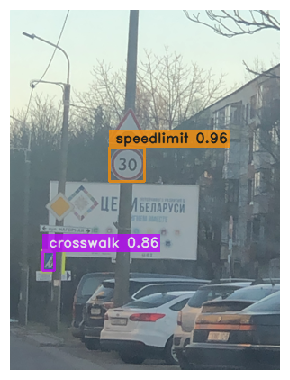

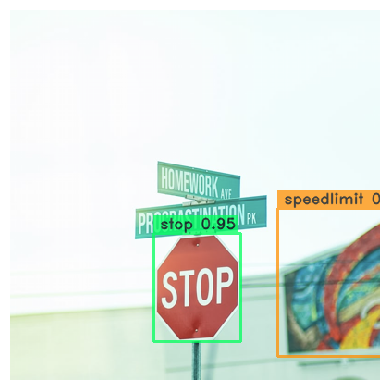

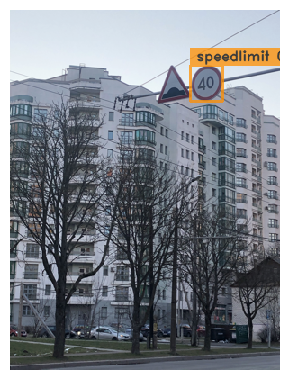

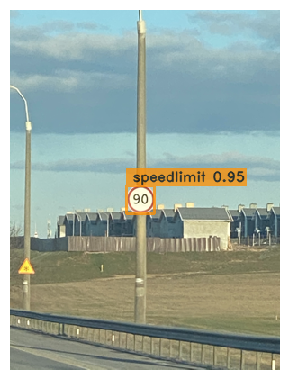

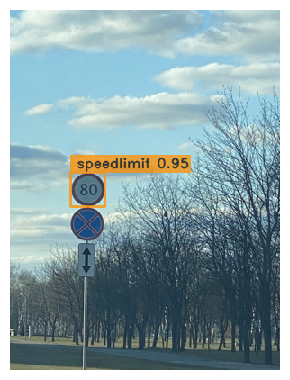

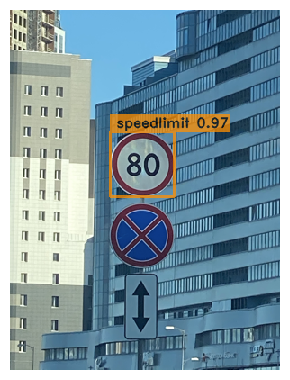

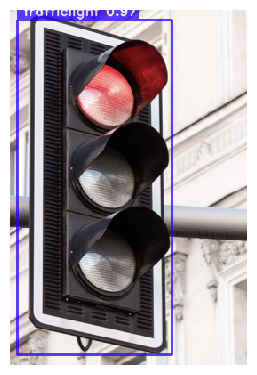

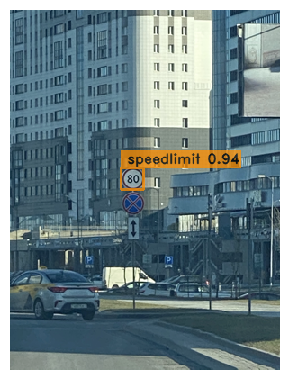

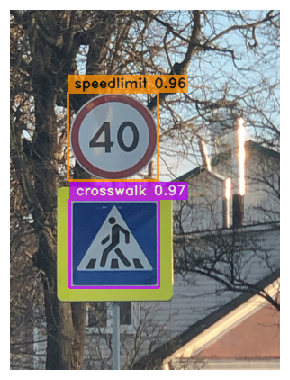

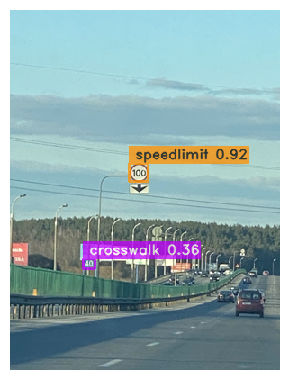

In [34]:
model.predict(tpaths2, conf=0.25).show()

In [35]:
trainer.test(model=model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=100, 
                                                   num_cls=config.NUM_CLASSES, 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=100,                                                                              nms_threshold=0.7)
                                                  ))

Testing:  80%|████████  | 4/5 [00:03<00:00,  1.20it/s]

{'PPYoloELoss/loss_cls': 0.48679802,
 'PPYoloELoss/loss_iou': 0.08438866,
 'PPYoloELoss/loss_dfl': 0.6453319,
 'PPYoloELoss/loss': 1.0204357,
 'Precision@0.50': 0.2677461504936218,
 'Recall@0.50': 0.9750000238418579,
 'mAP@0.50': 0.9576103687286377,
 'F1@0.50': 0.38288965821266174}

Testing: 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]
[2023-11-03 22:53:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


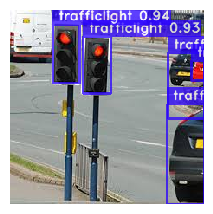

In [36]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxGAXJqmnzx2NtewVuYXwOqIzbLJwZP2UI0g&usqp=CAU'
model.predict(url,  conf=0.25).show()